# Breast Cancer - IA 2024

This project consists in the application of machine learning models and algorithms
related to supervised learning. 

- 0. Business Understanding 
    - 0.1. Business Goals
    - 0.2. Data Mining Problem Definition
    - 0.3. Data Mining Goals
- 1. Data Understanding
    - 1.1. About the Dataset
    - 1.2. Initial Data
    - 1.3. Explore Data
    - 1.4. Data Quality
- 2. Data Preparation
    - 2.1. Removing the Outliers
        - 2.1.1. Z-Score
        - 2.1.2. Interquartile Range (IQR)
    - 2.2. Cleaning the Dataset
    - 2.3. Correlation Matrix
    - 2.4. Recursive Feature Elimination
- 3. Modeling
    - 3.1. Unbalanced Data
    - 3.2. Building the Models
    - 3.3. Model Selection
        - 3.3.1. Decision Trees
            - 3.3.1.1. Parameter Tuning
        - 3.3.2. Neural Networks
            - 3.3.2.1. Parameter Tuning
        - 3.3.3. K-Nearest Neighbours (KNN)
            - 3.3.3.1. Parameter Tuning
        - 3.3.4. Support Vector Machines (SVM)
            - 3.3.4.1. Parameter Tuning
        - 3.3.5. Random Forest
            - 3.3.5.1. Parameter Tuning
- 4. Evaluation
    - 4.1. Performance Comparison of Models
    - 4.2. Time Comparison of Models
    - 4.3. Conclusion


## 0. Business Understanding

#### 0.1. Business Goals

We aim to improve healthcare outcomes using the breast cancer dataset. Our goal is to develop predictive models that reduce misdiagnosis rates, minimize unnecessary procedures, and enhance treatment outcomes for patients with breast masses.

#### 0.2. Data Mining Problem Definition

Our task is to create a model that accurately classifies breast masses as malignant or benign using features from digitized images. This model will help healthcare professionals make timely and accurate diagnoses, improving treatment planning and patient management.

#### 0.3. Data Mining Goals

Our goals include building an accurate predictive model and identifying key features that contribute to classification. We aim to enhance model interpretability and integration into clinical practice for better patient care.

To assess our algorithms' performance in classifying breast masses, we'll utilize key metrics: accuracy for overall correctness, precision for accurate identification of malignant cases, recall for capturing all actual malignant cases, and the F1 score for a balanced evaluation. Additionally, the confusion matrix will provide a detailed breakdown of classifications, offering insights into our model's performance.

## 1. Data Understanding

The Breast Cancer dataset consists of features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe characteristics of cell nuclei present in the image.

### 1.1. About the Dataset

The dataset contains 569 registers 62.7% being of type B (Benign) and 37.3% being of type M (Malignant) and is composed of 32 attributes. 

These attributes are:
- **ID**: Unique identifier for each sample.
- **Diagnosis**: The diagnosis of the breast mass (Malignant - M, Benign - B).
- **Radius Mean**: Mean of distances from the center to points on the perimeter.
- **Texture Mean**: Standard deviation of gray-scale values.
- **Perimeter Mean**: Mean size of the core tumor.
- **Area Mean**: Mean area of the core tumor.
- **Smoothness Mean**: Mean smoothness of the cell nuclei.
- **Compactness Mean**: Mean compactness of the cell nuclei.
- **Concavity Mean**: Mean concavity of the cell nuclei.
- **Concave Points Mean**: Mean number of concave portions of the contour.
- **Symmetry Mean**: Mean symmetry of the cell nuclei.
- **Fractal Dimension Mean**: Mean "coastline approximation" - 1.
- **Radius SE**: Standard error for the mean of distances from the center to points on the perimeter.
- **Texture SE**: Standard error for the standard deviation of gray-scale values.
- **Perimeter SE**: Standard error for the mean size of the core tumor.
- **Area SE**: Standard error for the mean area of the core tumor.
- **Smoothness SE**: Standard error for the mean smoothness of the cell nuclei.
- **Compactness SE**: Standard error for the mean compactness of the cell nuclei.
- **Concavity SE**: Standard error for the mean concavity of the cell nuclei.
- **Concave Points SE**: Standard error for the mean number of concave portions of the contour.
- **Symmetry SE**: Standard error for the mean symmetry of the cell nuclei.
- **Fractal Dimension SE**: Standard error for the mean "coastline approximation" - 1.
- **Radius Worst**: Largest radius measured from the center to the perimeter of the tumor.
- **Texture Worst**: Highest variation in gray-scale values in the tumor.
- **Perimeter Worst**: Largest perimeter measurement of the tumor.
- **Area Worst**: Largest area measurement of the tumor.
- **Smoothness Worst**: Highest level of surface irregularity measured on the tumor cells.
- **Compactness Worst**: Greatest density of the tumor cells (closeness of the cells).
- **Concavity Worst**: Largest concavity observed in the tumor cell contours.
- **Concave Points Worst**: Maximum number of concave points detected on the tumor contour.
- **Symmetry Worst**: Least symmetry observed in the tumor cells.
- **Fractal Dimension Worst**: Highest complexity observed in the tumor cell borders.

Target Variable:
- **Diagnosis**: Malignant (M) or Benign (B).

### 1.2. Initial Data

In [1]:
import numpy as np
import pandas
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time
import warnings

from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from scipy.stats import zscore
from sklearn.exceptions import ConvergenceWarning 
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, ConfusionMatrixDisplay, fbeta_score)
from sklearn.model_selection import (train_test_split, StratifiedKFold,
                                     GridSearchCV)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_metrics = {
    'DecisionTreeClassifier': [],
    'MLPClassifier': [],
    'KNeighborsClassifier': [],
    'SVC': [],
    'RandomForestClassifier': []
}

In [2]:
df = pandas.read_csv("../data/data.csv")

df.drop(['id'], axis=1, inplace=True) # Drop the 'id' column as it is not needed for analysis

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.3. Explore Data

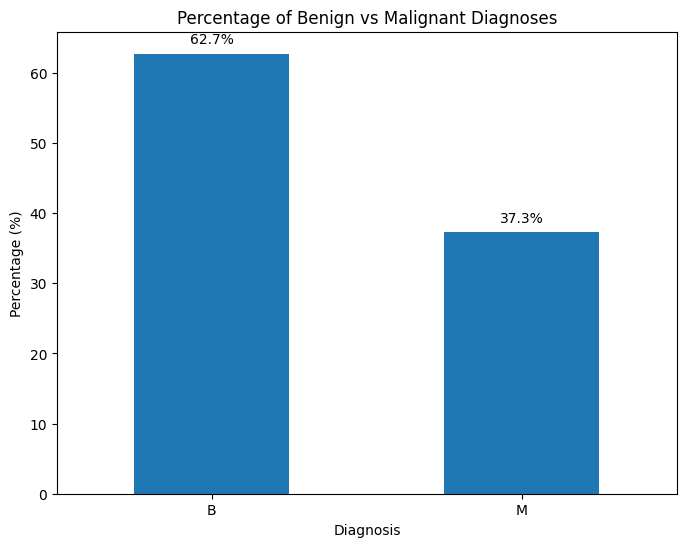

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
diagnosis_counts = df['diagnosis'].value_counts(normalize=True) * 100  # Convert to percentages

plt.figure(figsize=(8, 6))
ax = diagnosis_counts.plot(kind='bar') # Create a bar plot for percentages
plt.title('Percentage of Benign vs Malignant Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0) 

# Show the percentages on the bars for better understanding
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

df.describe() # Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution

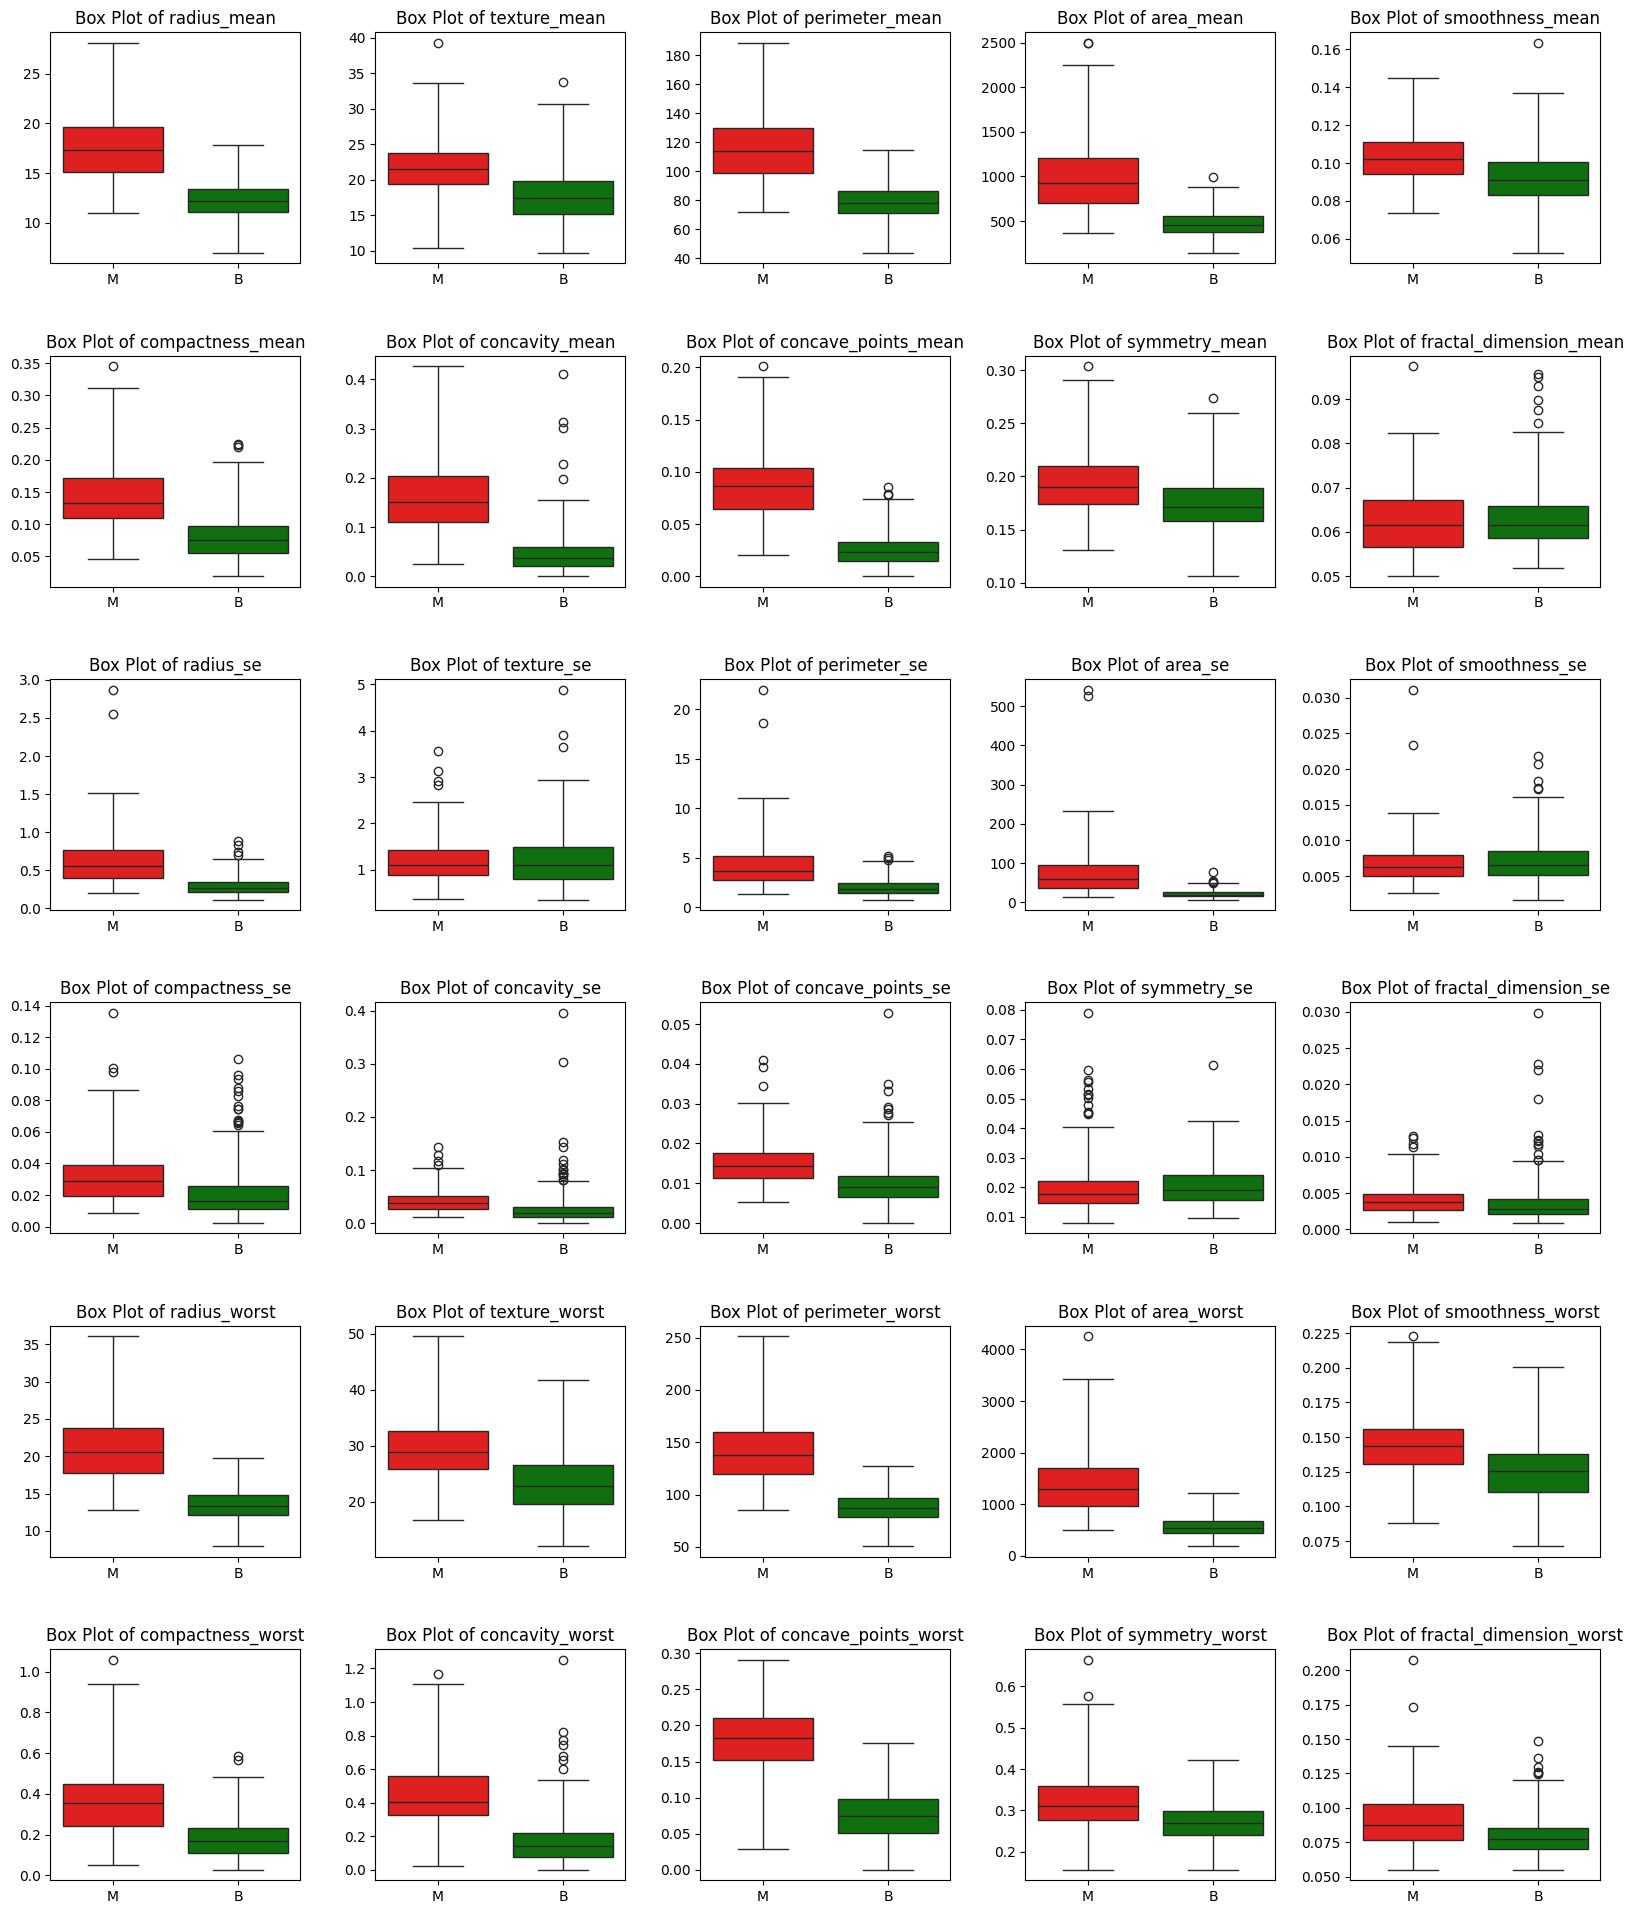

In [4]:
def box_plot():

    # Select numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    n_cols = 5  # Number of columns for subplots
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))  # Create subplots
    fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust the space between subplots

    custom_palette = {'B': 'green', 'M': 'red'}  # B for benign, M for malignant

    # Plot each boxplot on a subplot
    for index, column in enumerate(numeric_columns):
        row = index // n_cols
        col = index % n_cols

        # Adjust the whis parameter to extend the whiskers
        sb.boxplot(x='diagnosis', y=column, hue='diagnosis', data=df, ax=axs[row, col], palette=custom_palette, whis=2.5, legend=False)  
        axs[row, col].set_title(f'Box Plot of {column}')
        axs[row, col].set_xlabel('')
        axs[row, col].set_ylabel('')

    if len(numeric_columns) % n_cols != 0:  # Hide the last subplot if it is not used
        for ax in axs.flat[len(numeric_columns):]:
            ax.set_visible(False)

    plt.show()

box_plot()

def hist():
    df.hist(figsize=(20, 20), color='blue',
        edgecolor='black', alpha=0.4, bins=10, grid=False)

The box plot visualizes the distribution of data, highlighting the median, interquartile range (IQR), and overall variability within each class.

By extending the whiskers to 2.5 times the IQR, we capture a broader data range, reducing the number of points considered outliers. These whiskers indicate the minimum and maximum values within this adjusted range, while outliers — values that are unusually high or low relative to the rest of the data — are displayed as individual points outside the whiskers. These points will be addressed later in the analysis.

Additionally, the analysis suggests potential correlations among some values. Confirming these correlations could lead to the removal of redundant variables. We plan to explore and address these correlations in subsequent phases of our analysis.

This approach helps us better understand the dataset's spread and central tendencies, important for diagnosing and planning patient treatment. 

### 1.4. Data Quality

Poor data quality negatively affects many data processing efforts. As we have observed in our dataset, it contains outliers and noise — extraneous objects or modifications to original values — that disrupt the analysis. We will also investigate the presence of missing values and duplicated data. Addressing these issues is essential for ensuring the integrity and accuracy of our findings.

In [5]:
null = df.isnull().sum().sum()  # Check for null values
nan = df.isna().sum().sum()  # Check for NaN values
duplicate = df.duplicated().sum()  # Check for duplicate rows

number = null + nan + duplicate  # Calculate the total number for data issues

print(f"Number of Null + NaN + Duplicates: {number}")

Number of Null + NaN + Duplicates: 0


## 2. Data Preparation

While our dataset is free of missing or duplicated entries, it does contain outliers.

### 2.1. Removing the Outliers

To address these issues, we are implementing two statistical methods: the Z-Score and the Interquartile Range (IQR). These techniques will be compared to ensure the most effective identification and removal of outliers, enhancing the accuracy of our analyses.

Let's begin by utilizing a scatter plot, which we find more intuitive to interpret compared to box plots due to its comprehensive display of all attributes. 

First we will observe the raw data presentation without any alterations made to the dataset.

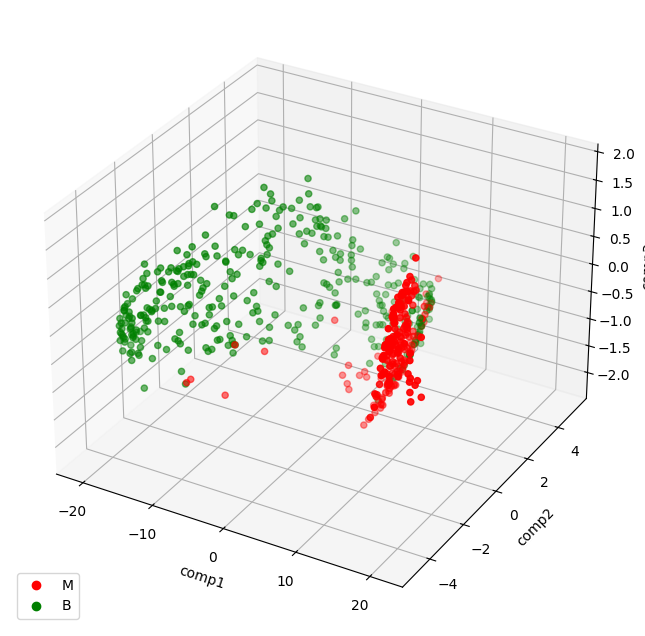

In [6]:
X = df.drop(['diagnosis'], axis=1)

diagnosis_map = {'M': -1, 'B': 1}
df['diagnosis_mapped'] = df['diagnosis'].map(diagnosis_map)

# Perform t-SNE
tsne = TSNE(n_components=3, perplexity=50, random_state=42).fit_transform(X)
tsne_df = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])
tsne_df['diagnosis'] = df['diagnosis_mapped']

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_df['comp1'], tsne_df['comp2'], tsne_df['comp3'], c=tsne_df['diagnosis'],
                    cmap=ListedColormap(['red', 'green']))

# Labels and legend
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
legend = plt.legend(*scatter.legend_elements(), loc='lower left')
legend.get_texts()[0].set_text('M')
legend.get_texts()[1].set_text('B')

plt.show()

Previously in the box plots, we noted that certain data points would be considered outliers. With the above plot we have that confirmation, for example, some red dots deviate significantly from the expected distribution. 

Now, we'll revisit the plot, this time considering outliers and the methodologies employed to detect them.

#### 2.1.1. Z-Score

The Z-score quantifies how many standard deviations a data point is from the mean of the dataset. A Z-score of 0 signifies that the data point is at the mean. Positive or negative values indicate the number of standard deviations the data point is above or below the mean, respectively. This measurement is crucial for identifying outliers, which we define as observations that lie beyond 3 standard deviations from the mean.

We'll start by appling the method and identifying the outliers in a new column named "outliers_zscore". Outliers will be marked as True and Inliers will be marked as False

In [7]:
df.drop(['diagnosis_mapped'], axis=1, inplace=True)  # Drop the diagnosis_mapped column

# Drop the target variable for unsupervised learning
X = df.drop(['diagnosis'], axis=1)

X_scaled = X.apply(zscore)

# Detect outliers based on a threshold (e.g., 3 standard deviations)
outliers = (np.abs(X_scaled) > 3).any(axis=1)

pandas.set_option('future.no_silent_downcasting', True)
df['outliers_zscore'] = outliers.astype(int).replace({1: True, 0: False}) # Add a column to indicate outliers based on z-score method 

# check if the column was added
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,outliers_zscore
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,False
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,False
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,False
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,False
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,False
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,False
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,False
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,True


Next, we'll compare the base scatter plot with the values flagged as outliers using the Z-Score method.

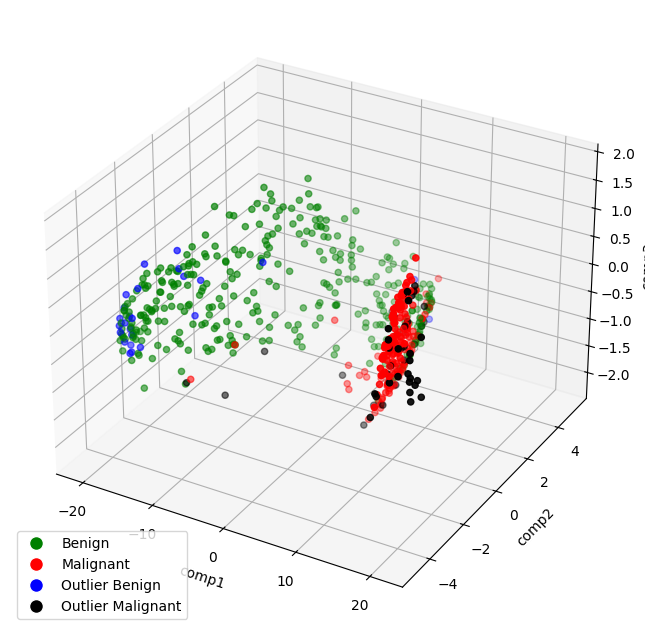

In [8]:

def zscore_scatter():
       colors = {
       ('B', False): 'green',  # Non-outlier Benign
       ('M', False): 'red',    # Non-outlier Malignant
       ('B', True): 'blue',    # Outlier Benign
       ('M', True): 'black'    # Outlier Malignant
       }

       # Apply the color map to each row in the dataframe
       outlier_colors = df.apply(lambda row: colors[(row['diagnosis'], row['outliers_zscore'])], axis=1)

       # Run t-SNE if not already done
       tsne = TSNE(n_components=3, perplexity=50, random_state=42).fit_transform(df.drop(['diagnosis', 'outliers_zscore'], axis=1))
       tsne_df = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])

       # Create the scatter plot
       fig = plt.figure(figsize=(8, 8))
       ax = fig.add_subplot(111, projection='3d')
       scatter = ax.scatter(tsne_df['comp1'], tsne_df['comp2'], tsne_df['comp3'], c=outlier_colors)

       # Custom legend
       legend_elements = [
       Line2D([0], [0], marker='o', color='w', label='Benign',
              markerfacecolor='green', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Malignant',
              markerfacecolor='red', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Outlier Benign',
              markerfacecolor='blue', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Outlier Malignant',
              markerfacecolor='black', markersize=10)
       ]
       ax.legend(handles=legend_elements, loc='lower left')

       # Axis labels
       ax.set_xlabel('comp1')
       ax.set_ylabel('comp2')
       ax.set_zlabel('comp3')

       plt.show()

zscore_scatter()

Upon comparison, some of the previously suspected dots have indeed been confirmed as outliers. However, there are discrepancies: certain dots we anticipated as outliers remain unflagged, while unexpectedly, others are now identified as outliers. 

To further validate these findings, we'll explore another outlier detection method.

#### 2.1.2. Interquartile Range (IQR)

The Interquartile Range (IQR) measures the statistical dispersion of the data by evaluating the range between the first quartile (25th percentile) and the third quartile (75th percentile). It identifies the middle 50% of the dataset. To detect outliers, we utilize the IQR in conjunction with a multiplier, typically set at 1.5 times the IQR. Observations falling below the first quartile minus the multiplier times the IQR or above the third quartile plus the multiplier times the IQR are deemed outliers.

As before, we'll start by appling the method and identifying the outliers in a new column named "outliers_iqr". Outliers will be marked as True and Inliers will be marked as False


In [9]:
# Drop the target variable for unsupervised learning
X = df.drop(['diagnosis'], axis=1)

# Calculate the IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)

# Add a column to indicate outliers based on IQR method
df['outliers_iqr'] = outliers.astype(int).replace({1: True, 0: False})

# Check if the column was added
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,outliers_zscore,outliers_iqr
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True,True
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,False,True
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,False,True
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True,True
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,False,True
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,False,True
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,False,False
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,False,False
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,False,True
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,True,True


Next, we'll compare the base scatter plot with the values flagged as outliers using the IQR method.

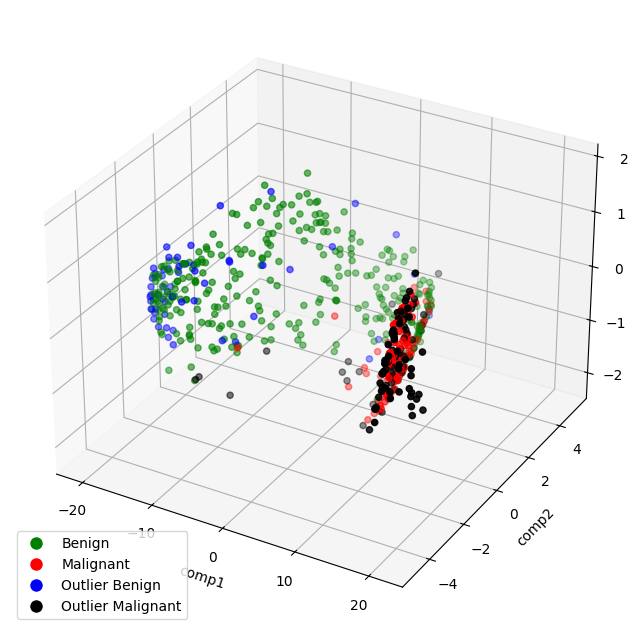

In [10]:

def irq_scatter():
       colors = {
       ('B', False): 'green',  # Non-outlier Benign
       ('M', False): 'red',    # Non-outlier Malignant
       ('B', True): 'blue',    # Outlier Benign
       ('M', True): 'black'    # Outlier Malignant
       }

       # Apply the color map to each row in the dataframe
       outlier_colors = df.apply(lambda row: colors[(row['diagnosis'], row['outliers_iqr'])], axis=1)

       # Run t-SNE if not already done
       tsne = TSNE(n_components=3, perplexity=50, random_state=42).fit_transform(df.drop(['diagnosis', 'outliers_iqr'], axis=1))
       tsne_df = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])

       # Create the scatter plot
       fig = plt.figure(figsize=(8, 8))
       ax = fig.add_subplot(111, projection='3d')
       scatter = ax.scatter(tsne_df['comp1'], tsne_df['comp2'], tsne_df['comp3'], c=outlier_colors)

       # Custom legend
       legend_elements = [
       Line2D([0], [0], marker='o', color='w', label='Benign',
              markerfacecolor='green', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Malignant',
              markerfacecolor='red', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Outlier Benign',
              markerfacecolor='blue', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Outlier Malignant',
              markerfacecolor='black', markersize=10)
       ]
       ax.legend(handles=legend_elements, loc='lower left')

       # Axis labels
       ax.set_xlabel('comp1')
       ax.set_ylabel('comp2')
       ax.set_zlabel('comp3')

       plt.show()

irq_scatter()

It's evident that the IQR method flagged significantly more points as outliers. However, to ensure the accuracy of our outlier identification, we need to determine which points are truly outliers. 

To achieve this, we'll investigate where both methods agree and what implications this agreement has for the dataset as a whole.

In [11]:
# Calculate the number of outliers detected by each method

outliers_iqr_count = df['outliers_iqr'].sum()
outliers_zscore_count = df['outliers_zscore'].sum()
agreed_outliers_count = ((df['outliers_iqr'] == True) & (df['outliers_zscore'] == True)).sum()

# Calculate the percentage of True values for each method
total_samples = len(df)
percentage_outliers_iqr = (outliers_iqr_count / total_samples) * 100
percentage_outliers_zscore = (outliers_zscore_count / total_samples) * 100
percentage_agreed_outliers = (agreed_outliers_count / total_samples) * 100

# Print the results
print("Number of outliers detected by IQR method:", outliers_iqr_count)
print("Number of outliers detected by Z-Score method:", outliers_zscore_count)
print("Percentage of outliers detected by IQR method:", percentage_outliers_iqr, "%")
print("Percentage of outliers detected by Z-Score method:", percentage_outliers_zscore, "%")
print("Number of outliers detected by both methods (agreed outliers):", agreed_outliers_count)
print("Percentage of outliers detected by both methods (agreed outliers):", percentage_agreed_outliers, "%")

Number of outliers detected by IQR method: 171
Number of outliers detected by Z-Score method: 74
Percentage of outliers detected by IQR method: 30.052724077328648 %
Percentage of outliers detected by Z-Score method: 13.005272407732866 %
Number of outliers detected by both methods (agreed outliers): 74
Percentage of outliers detected by both methods (agreed outliers): 13.005272407732866 %


### 2.2. Cleaning the Dataset

Considering the size of our dataset, removing 13% of it would significantly impact our study of the models. Therefore, we've opted to replace the outlier values in the dataset with their respective median values. This approach ensures that our analysis remains robust while mitigating the influence of outliers on our results.

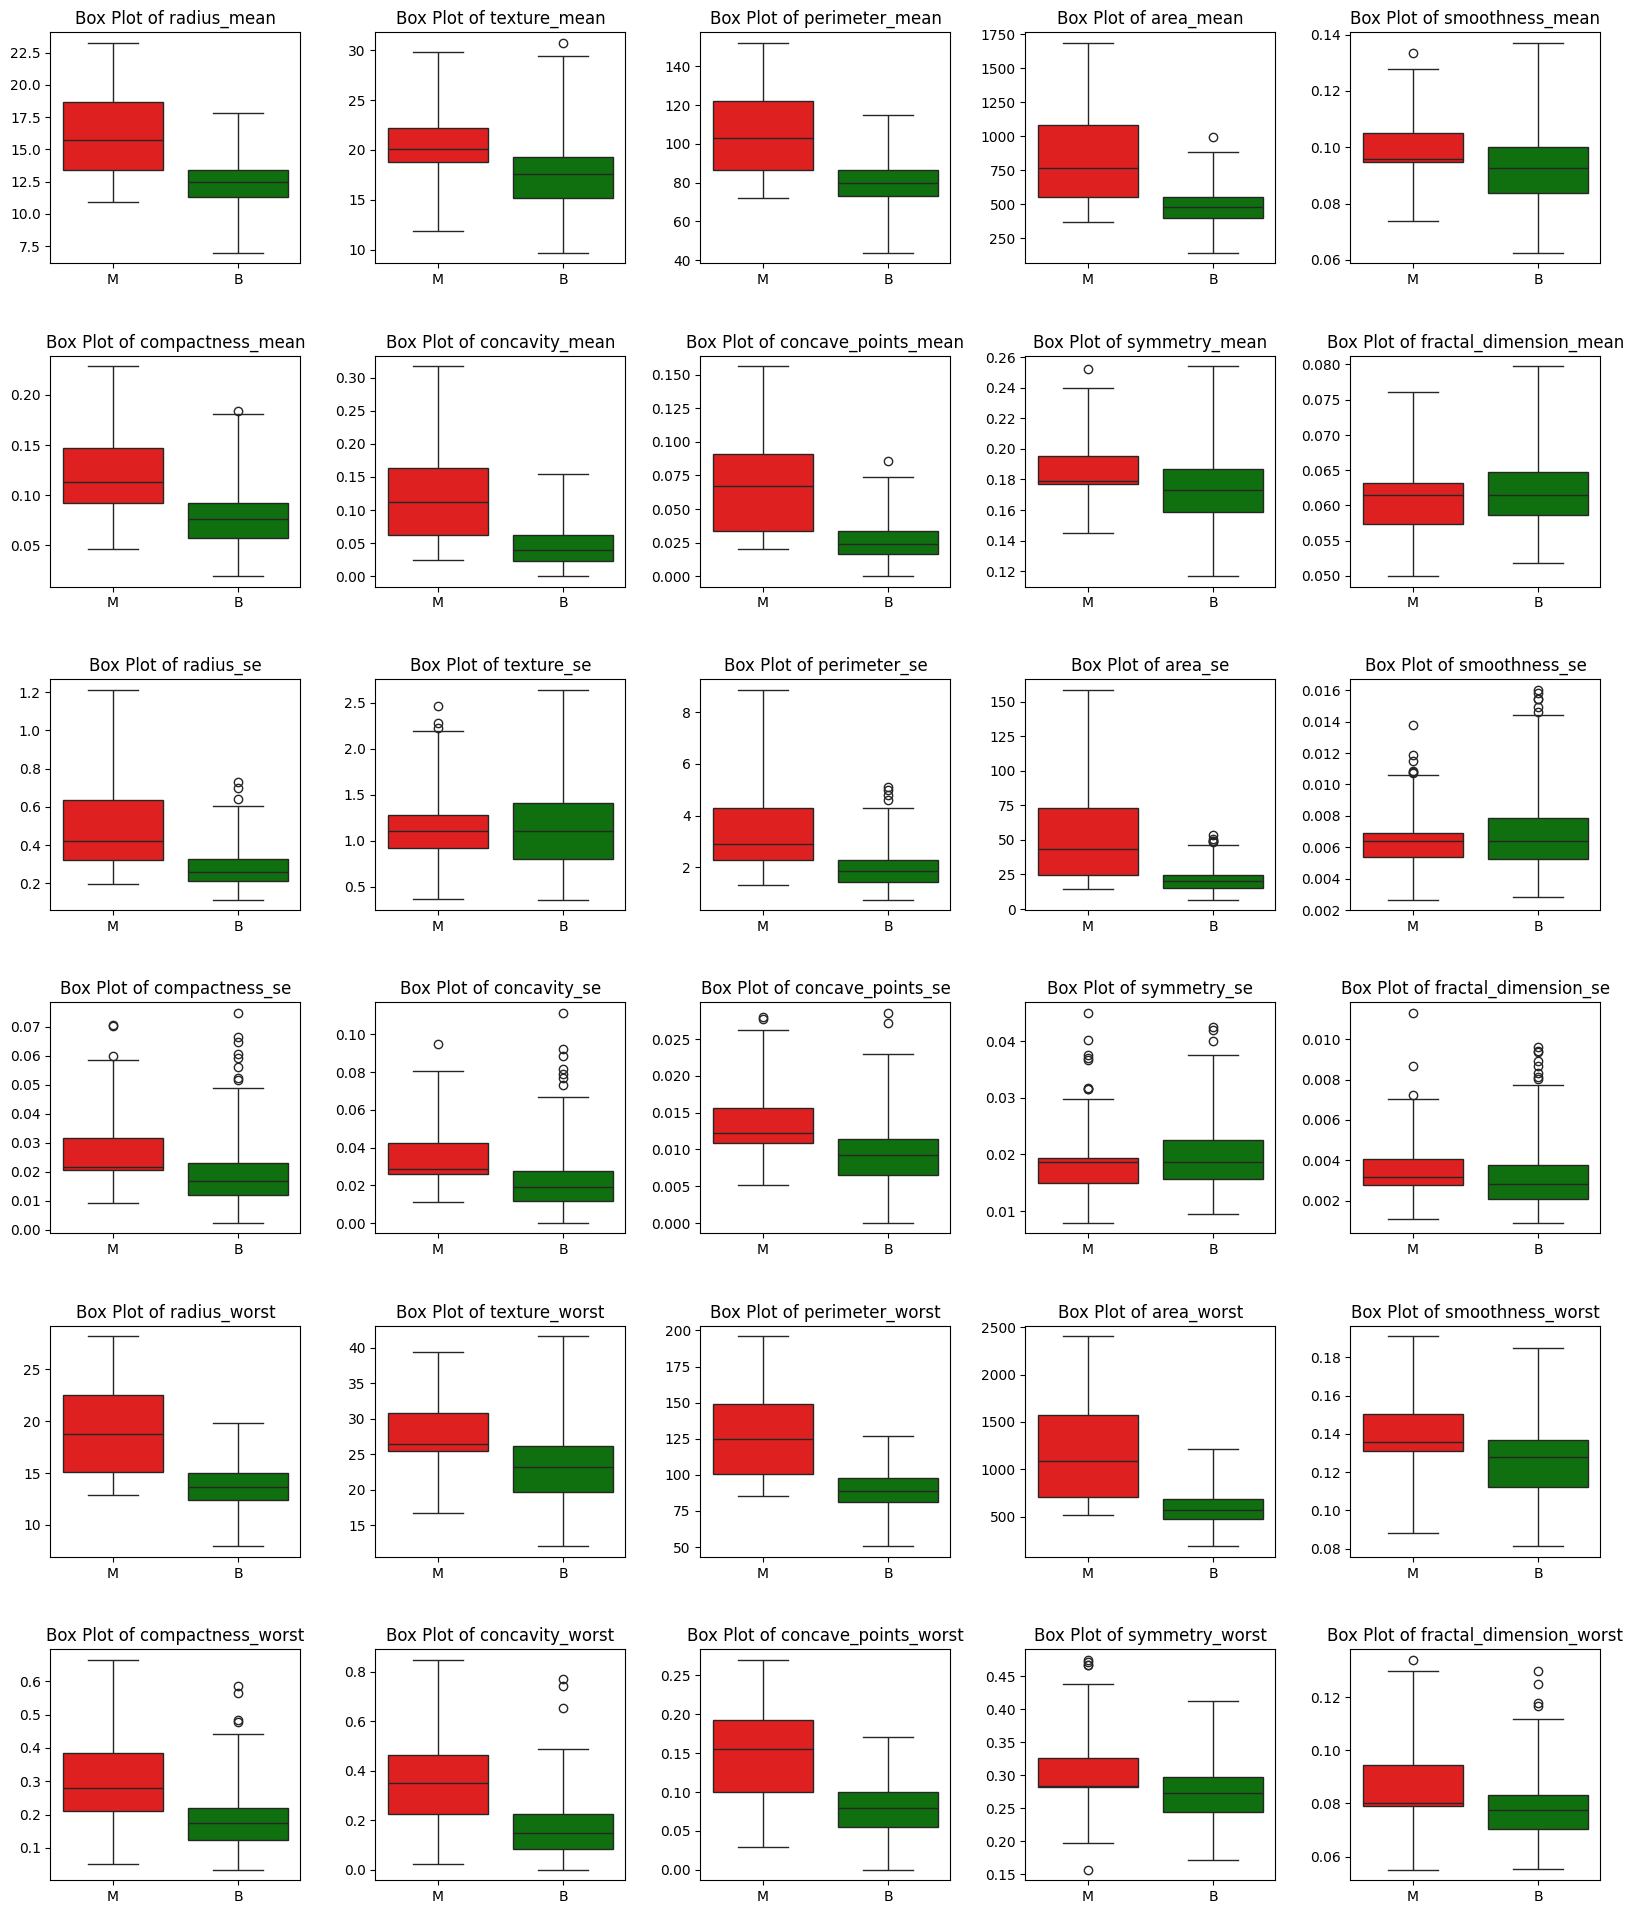

In [12]:
# Get the indices of agreed outliers
agreed_outliers_indices = df[(df['outliers_iqr'] == True) & (df['outliers_zscore'] == True)].index

# Replace outlier values with their respective median values
for column in X.columns:
    median_value = X[column].median()
    df.loc[agreed_outliers_indices, column] = median_value

df.drop(['outliers_iqr', 'outliers_zscore'], axis=1, inplace=True)  # Drop the outlier columns

# Check the first few rows of the modified dataset
df.head()

box_plot()


While the box plots show some improvement with fewer outliers, there are still some unusual values present. We'll need to study this deeper to ensure our approach is appropriate. 

It's also possible that these outliers represent rare but legitimate clinical cases.

For now, let's consider our data "free" of outliers and save it as clean dataset.

In [13]:
df.to_csv('../data/data_clean.csv', index=False)

Let's proceed by analyzing and comparing the cleaned dataset with the original dataset through the use of histograms. This will allow us to visually assess differences and identify any significant changes or patterns resulting from the data cleaning process.

First let's check the old dataset:

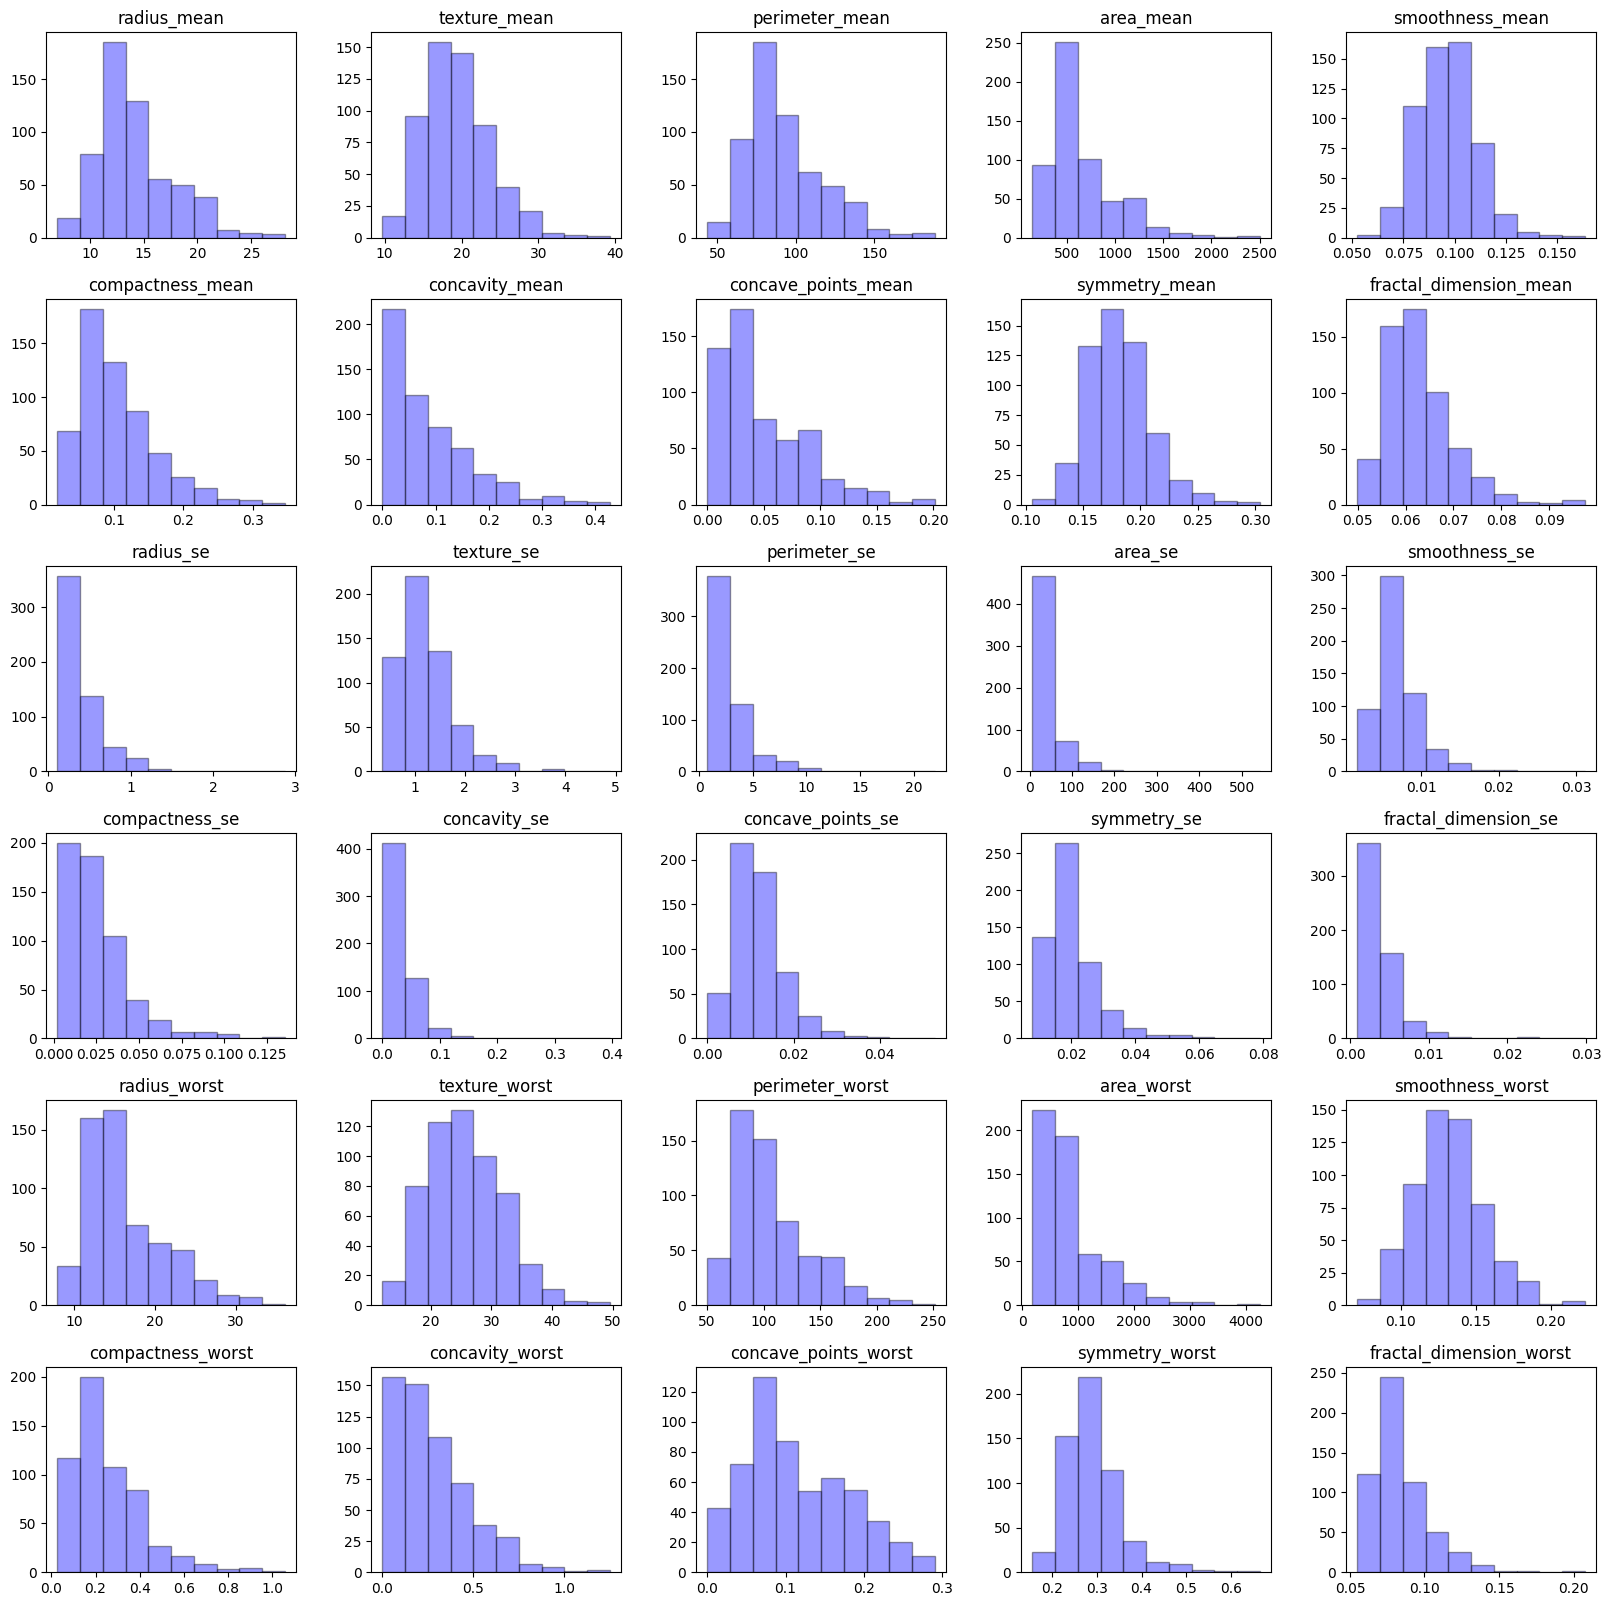

In [14]:
# DATA BEFORE ANYTHING
Y = pandas.read_csv("../data/data.csv")

Y.drop(['id'], axis=1, inplace=True) # Drop the 'id' column as it is not needed for analysis

Y.hist(figsize=(20, 20), color='blue',
        edgecolor='black', alpha=0.4, bins=10, grid=False);

Now the new dataset:

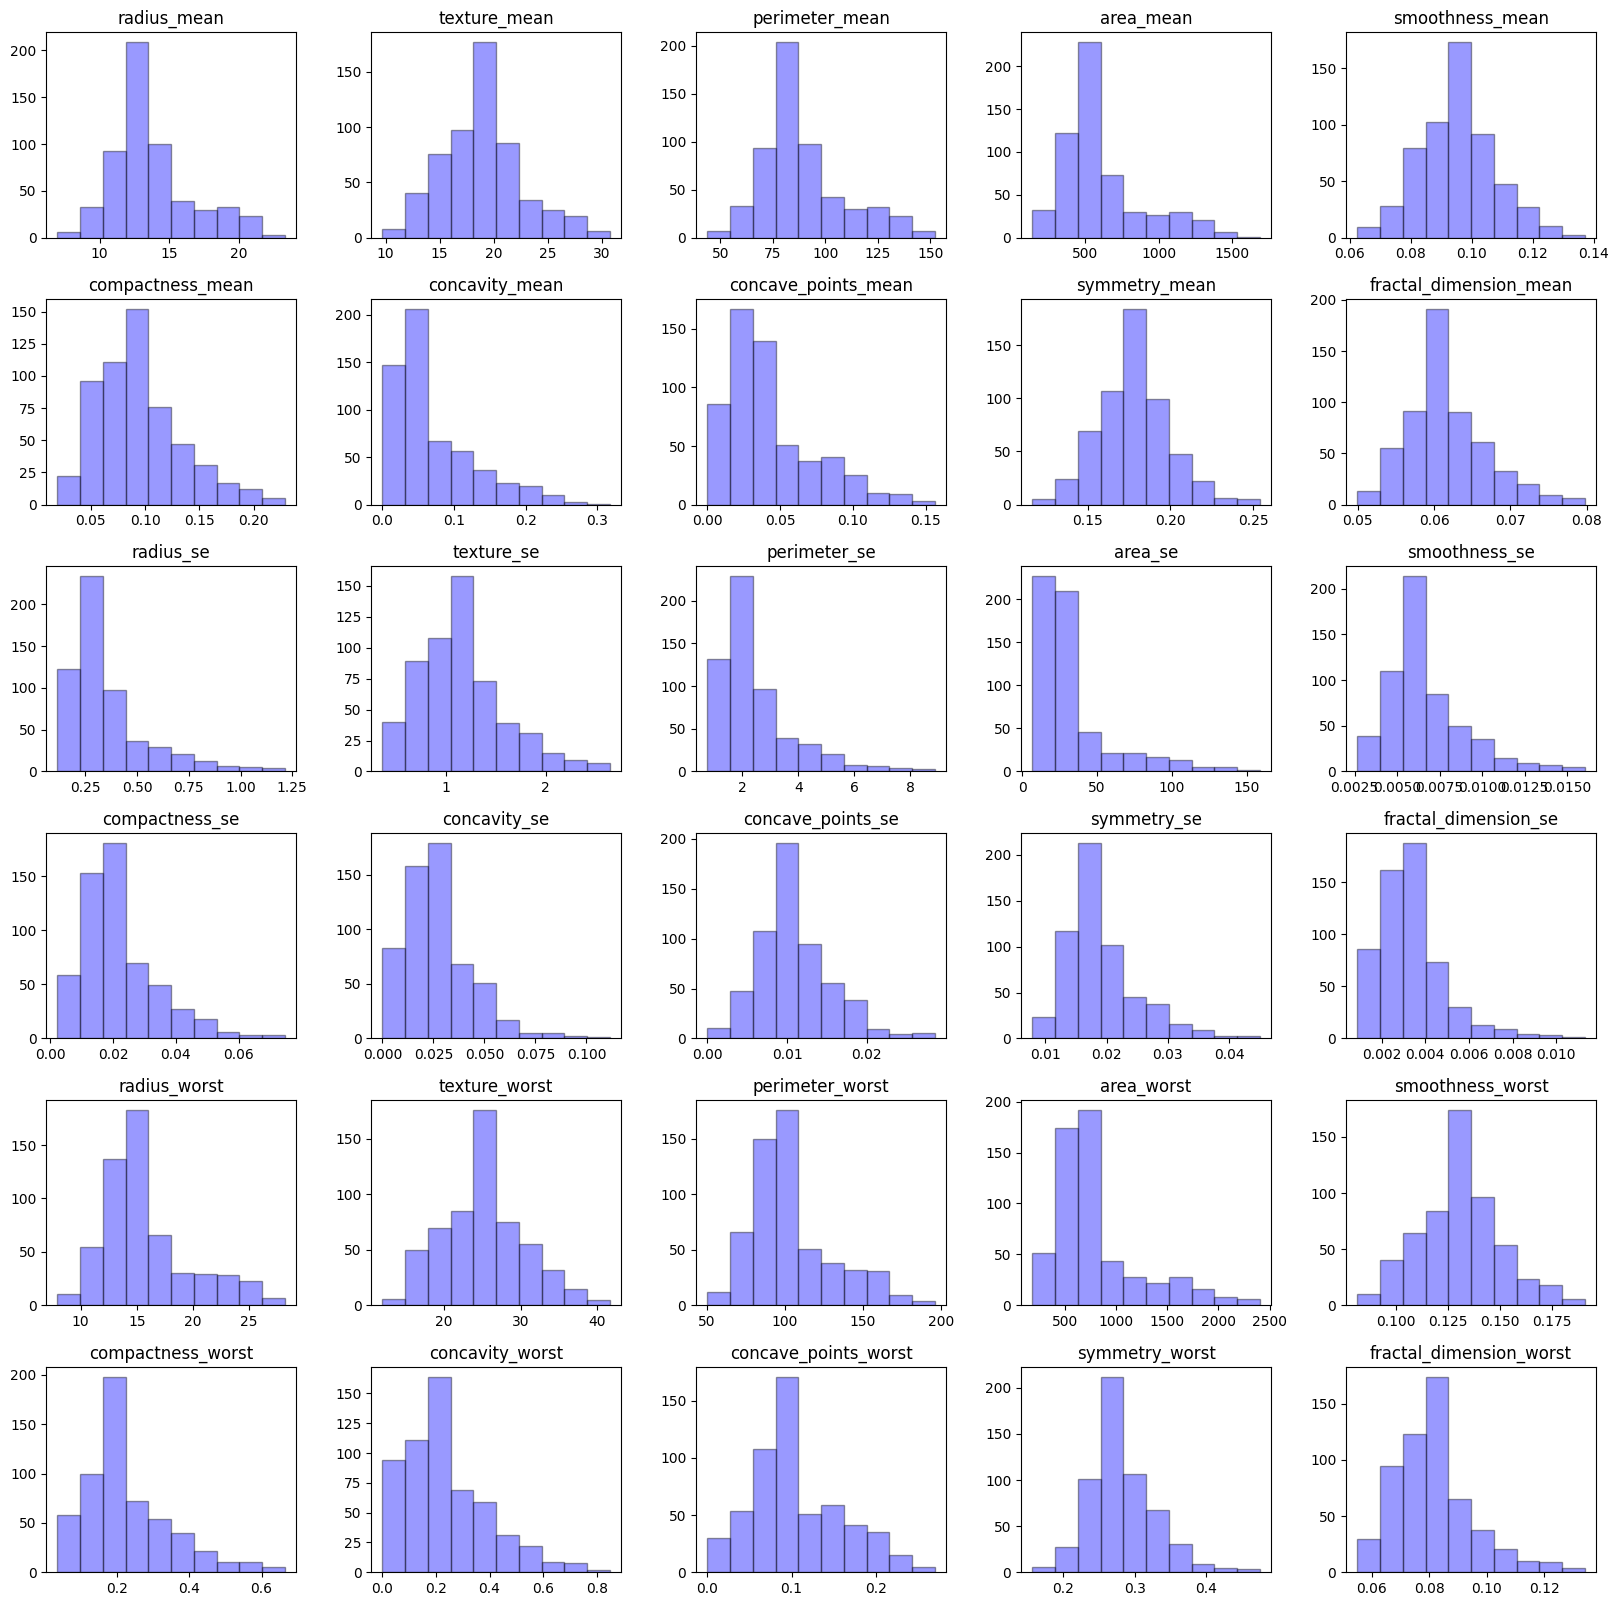

In [15]:
# DATA AFTER CLEANING
X = pandas.read_csv("../data/data_clean.csv", index_col=None)

X.hist(figsize=(20, 20), color='blue',
        edgecolor='black', alpha=0.4, bins=10, grid=False);

After removing outliers using the median, the dataset looks different. The histograms now show narrower distributions, meaning the data isn't spread out as much and doesn't skew as heavily. This suggests that the middle values, or medians, are now a better representation of the overall data.

It's worth noting that extreme values, especially in features like radius_worst, texture_worst, and area_worst, have been reduced. This makes the dataset more reliable for statistical analysis since there are fewer extreme values that could throw off the results.

We made sure not to lose any important information while removing outliers, especially considering the medical context of the study. This means we're still keeping track of significant data points that could be crucial for our analysis.

### 2.3. Correlation Matrix

A correlation matrix is an essential tool in statistical analysis that measures the strength and direction of the linear relationship between pairs of variables. Each cell in the matrix displays the correlation coefficient between two variables. This coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable increases proportionally.
- -1 indicates a perfect negative correlation, meaning that as one variable increases, the other decreases proportionally.
- 0 signifies no correlation, implying that the two variables do not have any linear relationship.

In the correlation matrix, variables are listed on both the rows and columns, with the main diagonal typically representing the correlation of each variable with itself, always equal to 1. Visualizing this matrix through a heatmap can quickly help identify areas where variables are strongly correlated, which can be crucial for tasks such as feature selection and predictive modeling. Filtering this matrix to display only strong correlations (for example, greater than 0.5 or less than -0.5) allows researchers to focus on more significant and potentially informative relationships.

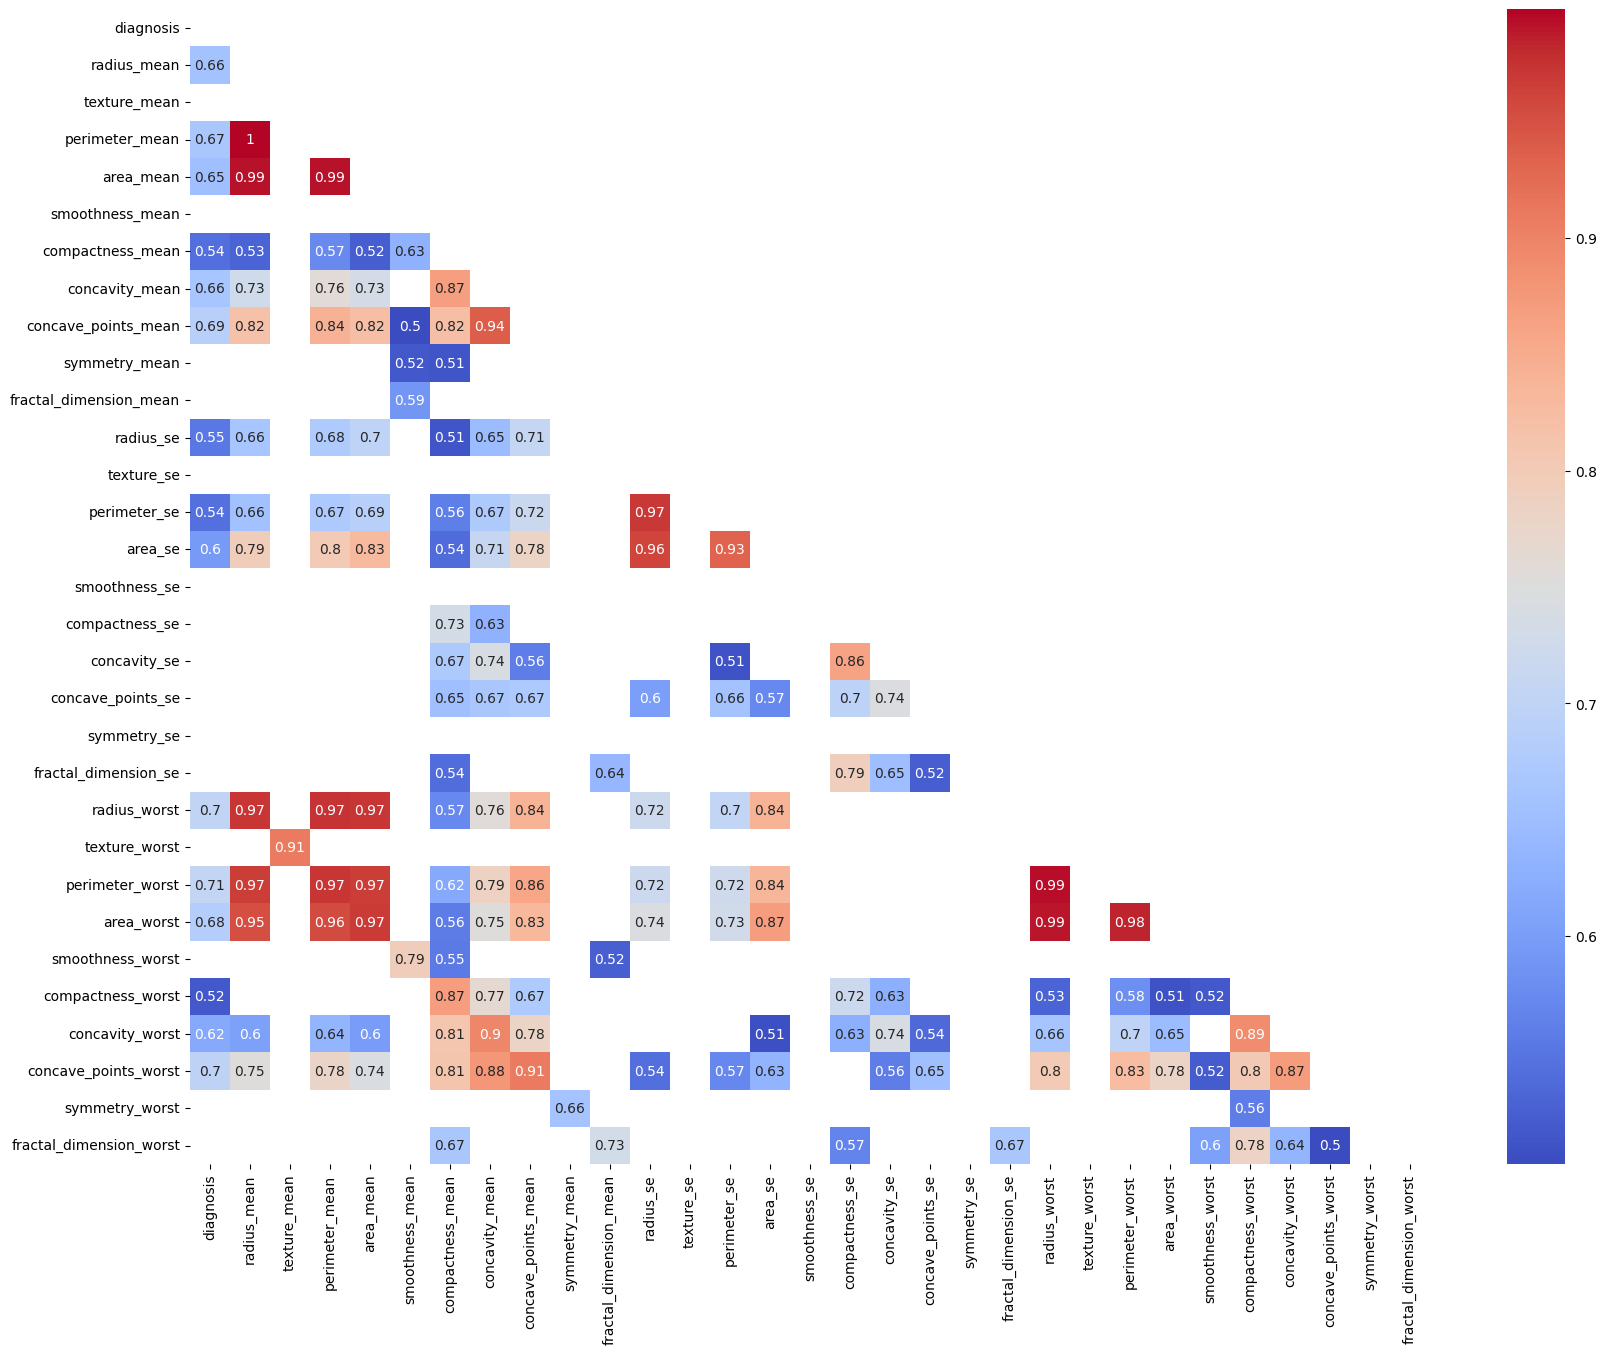

In [16]:
# calculate the correlation between each pair of columns
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
corr_matrix = df.corr()

# Select only the columns with a correlation greater than 0.5 or less than -0.5
corr_matrix = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 15))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax, mask=mask)
plt.show()

df['diagnosis'] = df['diagnosis'].map({0: 'B', 1: 'M'})  # Swapping Back

Several features show a high degree of positive correlation, particularly those related to size (like radius, perimeter, and area), suggesting these may be interdependent. Conversely, the fractal dimension shows weaker correlations with other features, which could imply it provides distinct information.

Now, let´s check, in more detail, how these features relate with diagnosis.

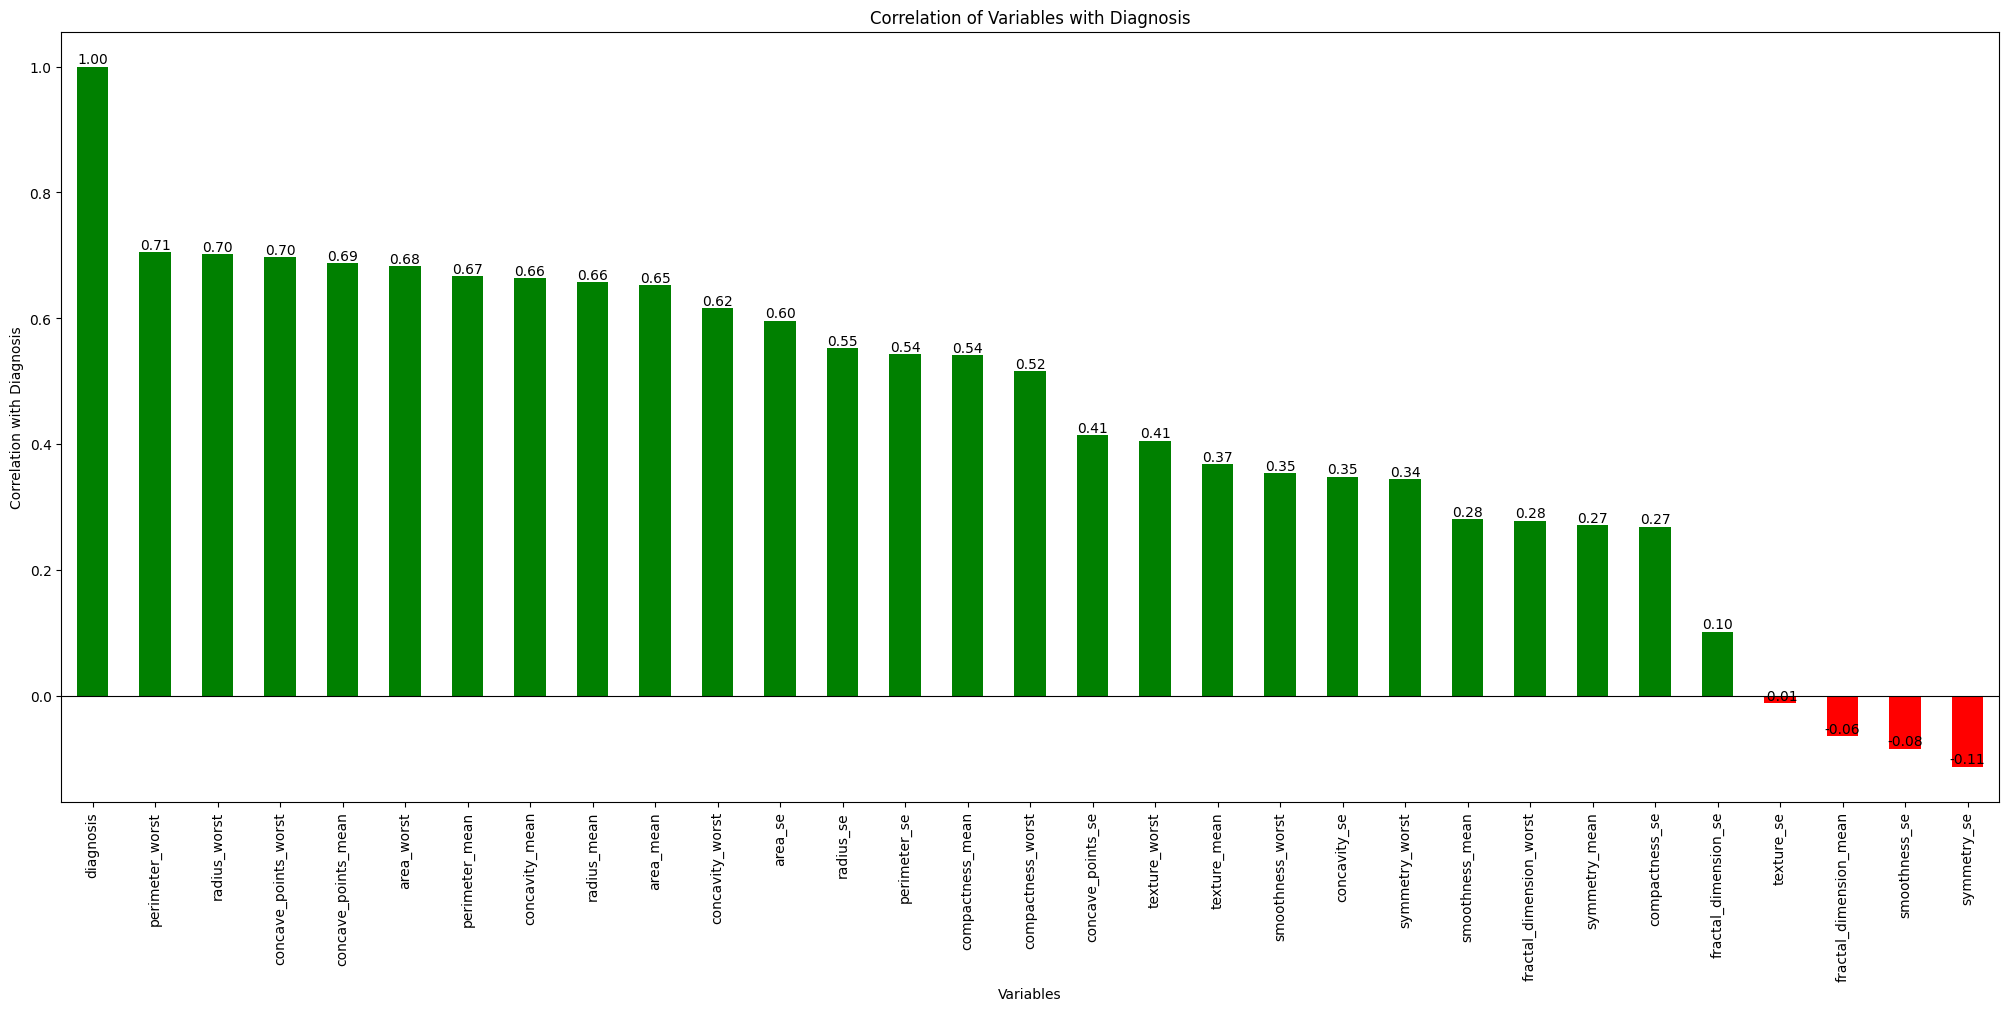

In [17]:
# Calculate the correlation between each pair of columns with the target variable

df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
corr_matrix = df.corr()

diagnosis_corr = corr_matrix['diagnosis'].sort_values(ascending=False)

plt.figure(figsize=(25, 10))
colors = ['green' if x >= 0 else 'red' for x in diagnosis_corr.values]
bars = diagnosis_corr.plot(kind='bar', color=colors)

plt.title('Correlation of Variables with Diagnosis')
plt.xlabel('Variables')
plt.ylabel('Correlation with Diagnosis')
plt.axhline(0, color='black', linewidth=0.8)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom', color='black')

plt.show()

df['diagnosis'] = df['diagnosis'].map({0: 'B', 1: 'M'})

To manually remove the least significant features based on their correlation with the diagnostic variable, we could start by choosing a significance threshold. 
We would then select only those features whose absolute correlation values are higher than the chosen threshold. This means that any feature with a correlation lower than this threshold is considered less significant and will be removed from our dataset.

For more efficient removal, we opted for recursive feature elimination, as we will show in the next section.

### 2.4. Recursive Feature Elimination (RFE)

Before adopting Recursive Feature Elimination (RFE) for feature selection, we evaluated several well-known algorithms, including:

- Forward Selection: Starts with no variables in the model, adding them one by one, based on which have the strongest statistical support.
- Backward Elimination: Begins with all variables and progressively removes the least significant ones, enhancing model accuracy by reducing overfitting and simplifying the model.
- Principal Component Analysis (PCA): A dimensionality reduction technique that transforms the original variables into a new set of variables (principal components), which are linear combinations of the original variables.

However, RFE was chosen due to its effectiveness in identifying and removing redundant or less significant features systematically.

This method iteratively constructs a model and removes the weakest feature (or features) until the desired number of features is achieved. This iterative reduction process helps in focusing on the most significant features, improving the model's performance by reducing noise and complexity.

This approach not only enhances the model's accuracy but also makes it more applicable to real-world scenarios such as predictive maintenance in engineering or feature selection in genomic studies by efficiently identifying the most predictive features.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

df = pandas.read_csv("../data/data_clean.csv", index_col=None)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Separating the independent variables (X) and the dependent variable (y)
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# Create the dtc model
model = DecisionTreeClassifier()

# Recursive Feature Elimination
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe.fit(X, y)

# Get the ranking of the features
ranking = rfe.ranking_

# Create a list of the significant features based on RFE ranking
significant_features = [X.columns[i] for i in range(len(X.columns)) if ranking[i] == 1]

print('Significant feature selected by RFE:')
print(significant_features)

Significant feature selected by RFE:
['concave_points_mean', 'radius_se', 'smoothness_se', 'symmetry_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst']


The recursive feature elimination process has successfully identified the 10  significant features that are potentially predictive of the diagnosis, which is coded as 0 for benign and 1 for malignant cases, leaving our dataset with the following look:

In [19]:
# Keep only the significant features 
df = pandas.read_csv("../data/data_clean.csv", index_col=None)
df = df[['diagnosis'] + significant_features]

df.head()

,diagnosis,concave_points_mean,radius_se,smoothness_se,symmetry_se,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst
0,M,0.03350,0.3242,0.006380,0.01873,14.97,25.41,686.5,0.1313,0.2119,0.2267
1,M,0.07017,0.5435,0.005225,0.01389,24.99,23.41,1956.0,0.1238,0.1866,0.2416
2,M,0.12790,0.7456,0.006150,0.02250,23.57,25.53,1709.0,0.1444,0.4245,0.4504
3,M,0.03350,0.3242,0.006380,0.01873,14.97,25.41,686.5,0.1313,0.2119,0.2267
4,M,0.10430,0.7572,0.011490,0.01756,22.54,16.67,1575.0,0.1374,0.2050,0.4000


## 3. Modeling

With the dataset analyzed and cleaned, we now transition to the core of our project: modeling. In this phase, we aim to build predictive models that will allow us to test hypotheses and make predictions based on our data. 

This section outlines our approach to selecting, training, and evaluating different machine learning models. We will explore distinct models to determine which best meets our project objectives.

### 3.1. Unbalanced Data

Since the dataset is quite unbalanced (357 benign and 212 malignant) and because models trained on unbalanced data tend to be biased towards the majority class, often at the expense of prediction accuracy for the minority class, we will explore three different feature sampling methods:

- **Oversampling the Minority Class**: This method involves replicating instances of the minority class to balance the class distribution. 
- **Undersampling the Majority Class**: This technique reduces the number of instances from the majority class to match the minority class size.
- **Synthetic Sample Generation (SMOTE)**: The Synthetic Minority Over-sampling Technique (SMOTE) generates synthetic samples from the minority class.

In [20]:
data = pandas.read_csv('../data/data_clean.csv')
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

print("Original class distribution:", Counter(y))

ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

X_ros, y_ros = ros.fit_resample(X, y)
X_rus, y_rus = rus.fit_resample(X, y)
X_smote, y_smote = smote.fit_resample(X, y)

print("Oversampled class distribution:", Counter(y_ros))
print("Undersampled class distribution:", Counter(y_rus))
print("SMOTE class distribution:", Counter(y_smote))

Original class distribution: Counter({'B': 357, 'M': 212})
Oversampled class distribution: Counter({'M': 357, 'B': 357})
Undersampled class distribution: Counter({'B': 212, 'M': 212})
SMOTE class distribution: Counter({'M': 357, 'B': 357})


Oversampling is good for small datasets because it keeps all the information, but it can cause overfitting. Overfitting happens when a model learns the training data so well, including its errors and unimportant details, that it performs poorly on new data. On the other hand, undersampling works well for very large datasets because it makes the model run faster, but it means losing some data.

Given that our dataset quite small and we want to keep as much information as possible without losing diversity, SMOTE (Synthetic Minority Over-sampling Technique) is the best choice. SMOTE creates new examples from the minority class, helping avoid overfitting and making our model predict better on new data.

So, we'll use SMOTE to prepare our data for building the model.

We'll use a default test_size of 25% for testing and 75% for training the model.

In [21]:
def applySampling(all_inputs, all_labels, test_size):
    smote = SMOTE(random_state=0)
    X_resampled, y_resampled = smote.fit_resample(all_inputs, all_labels)
    return train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=0)        

### 3.2. Building the Models

In this phase, we're going to test different classification models to find out which one works best. 

To make sure our results are reliable and not just lucky guesses, we will use cross-validation. This technique checks the model's performance using different data subsets for training and testing. We will also fine-tune each model's parameters to make them as effective as possible. We're focusing only on results from the best parameters to keep our evaluation clear and useful.

We'll use several key metrics to check each model's accuracy and reliability:

- **Accuracy**: This tells us how well the model works by showing the percentage of correct predictions from all predictions made.
- **Precision**: This is important when making a wrong positive prediction is costly. It shows how accurate the positive predictions are.
- **Recall**: Also called sensitivity, this measures if the model can find all the relevant cases. It's important when missing a positive case can have serious consequences.
- **F1 Score**: This is the average of precision and recall. It helps balance the two, especially when the classes are uneven and focusing on one metric might be misleading.
- **FBeta Score**: F Score with a Beta parameter that allows us to control whether we put more value on the precision or recall.

We will also look at the confusion matrix for each model. This chart shows the true positives, true negatives, false positives, and false negatives, helping us understand each model better.

- **True negatives**: these are cases the are labeled as Benign and are classified as Benign;
- **True positives**: these are cases the are labeled as Malign and are classified as Malign;
- **False negatives**: these are cases the are labeled as Malign and are classified as Benign;
- **False positives**: these are cases the are labeled as Benign and are classified as Malign;

The high proportion of true positives and true negatives in relation to all cases indicates a high degree of accuracy for the classifier. Low number of false negatives suggests high recall. Low number of false positives suggest high precision.

In medical diagnostics, accuracy is crucial, especially for conditions like cancer. Minimizing false negatives is vital as it ensures serious conditions are not overlooked. Although false positives are less desirable, they are preferable to false negatives because they lead to further tests rather than missed diagnoses.

The primary goal is to accurately detect malignant cases (true positives) while reducing false negatives. Even if some benign cases are mistakenly identified as malignant (false positives), this approach is safer as it prompts additional testing, ensuring no malignant condition is ignored.

In [22]:
def applyMetrics(model, testing_predictions, testing_inputs, testing_classes, start_train, end_train, start_test, end_test, dtc = False):
    
    accuracy = accuracy_score(testing_classes, testing_predictions)
    precision = precision_score(testing_classes, testing_predictions, pos_label = 1)
    recall = recall_score(testing_classes, testing_predictions, pos_label = 1)
    f1 = f1_score(testing_classes, testing_predictions, pos_label = 1)

    print("Accuracy: ", round(accuracy * 100, 3), "%")
    print("Precision: ", round(precision * 100, 3), "%")
    print("Recall: ", round(recall * 100, 3), "%")
    print("F1: ", round(f1 * 100, 3), "%")

    if(dtc ==  True):
        fbeta = fbeta_score(testing_classes, testing_predictions, beta = 4, pos_label = 1)
        print("FBeta with Beta = 4 : ", round(fbeta * 100, 3), "%")

    print("Training time: ", round(end_train - start_train, 3), "s")
    print("Testing time: ", round(end_test - start_test, 3), "s")

    model_name = type(model).__name__
    if model_name in model_metrics:
        model_metrics[model_name].clear()
        metrics = [accuracy, precision, recall, f1, end_train - start_train, end_test - start_test]
        model_metrics[model_name].append(metrics)
    
    # Generate and display the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    ConfusionMatrixDisplay.from_estimator(model, testing_inputs, testing_classes,
                                          display_labels=['Benign', 'Malignant'], cmap=plt.cm.Blues, ax=ax)
    ax.set_title('Confusion Matrix of the Classifier')
    plt.show()

### 3.3. Model Selection

In [23]:
# Prepare data
all_inputs = df.drop(['diagnosis'], axis=1).values
all_labels = df['diagnosis'].values

# Encode the target variable to numerical format
all_labels = LabelEncoder().fit_transform(all_labels)

# Standardize the inputs to have a mean of 0 and a standard deviation of 1
def standardize(inputs): 
    return StandardScaler().fit_transform(inputs)

We will evaluate the following models:

#### 3.3.1. Decision Trees

Decision Trees are a straightforward method used for classification and regression tasks. They split a dataset into smaller subsets using simple decision rules inferred from the data features, creating a tree-like model of decisions. This model is easy to understand and visualize. The depth of the tree is crucial and impacts the model's accuracy and complexity. Decision Trees are best for data where relationships between features are clear.
The backwards elimination is not necessary for the decision trees since they already make the feature selection.

In [24]:
df_dc = pandas.read_csv("../data/data_clean.csv", index_col=None)

# Prepare data
all_inputs_dc = df_dc.drop(['diagnosis'], axis=1).values
all_labels_dc = df_dc['diagnosis'].values

# Encode the target variable to numerical format
all_labels_dc = LabelEncoder().fit_transform(all_labels_dc)


##### 3.3.1.1. Parameter Tuning

General Decision Tree parameters to be studied:

- **max_depth**: The maximum depth of the tree.
    - Typical values may include 5, 10, 15, 20, 25, 30, allowing you to control the complexity and prevent overfitting by limiting how deep the tree can grow.
- **max_features**: The number of features to consider when looking for the best split.
    - Values might range from 15 to 30, which helps in controlling the randomness of the splits and can impact the performance depending on the nature of the data.
- **criterion**: This function measures the quality of a split. This correspond to log_loss function.
    - 'gini': Uses the Gini impurity.
    - 'entropy': Uses the information gain.
    - 'log_loss': Utilizes logarithmic loss, introduced in newer versions of the algorithms to handle probabilistic outputs more effectively.
- **ccp_alpha**: Complexity parameter used for Minimal Cost-Complexity Pruning.
    - Values typically start from 0.0 (no pruning) and they are tipically lower than 0.1. Pruning is used to simplify the decision tree, avoid overfitting, and improve the model's generalizability.
- **class weights**: This is used to penalize false negatives or false positives by making errors in one class or the other more relevant.


The variable best acts as a flag to choose which hyperparameters to use. When best is set to True, it selects the best hyperparameters already determined by previous analysis, making the search process quicker and more efficient.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score, recall_score

dtc = DecisionTreeClassifier()

def custom_fbeta_score(y_true, y_pred, Beta):
    return fbeta_score(y_true, y_pred, beta=Beta, pos_label=1)

best = True
if (best):
    parameter_grid = {'ccp_alpha': [0.0], 
                    'class_weight': [{0: 1, 1: 2}], 
                    'criterion': ['entropy'], 
                    'max_depth': [5], 
                    'max_features': [15]
                    }
else:
    parameter_grid = {'max_depth': [5,10, 15, 20, 25, 30],
                    'max_features': [15, 20, 25, 30],
                    'criterion': ['gini', 'entropy', 'log_loss'],
                    'ccp_alpha' : [0.0,0.010,0.02,0.030,0.040],
                    'class_weight' : [{0 : 1, 1 : 4}, {0 : 1 , 1 : 2}, {0 : 1 , 1 : 3}]
                    }
    
custom_fbeta_scorer = make_scorer(custom_fbeta_score, Beta=4)

# Using SMOTE to balance the dataset and split it into training and testing sets
(training_inputs, testing_inputs, training_classes, testing_classes) = applySampling(
    all_inputs_dc, all_labels_dc, 0.25)


training_inputs = standardize(training_inputs)
testing_inputs = standardize(testing_inputs)

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(dtc, param_grid=parameter_grid, cv=cross_validation, scoring=custom_fbeta_scorer)
grid_search.fit(training_inputs, training_classes)

best_params = grid_search.best_params_

print('Best parameters: ', grid_search.best_params_)

dtc.set_params(**best_params);

Best parameters:  {'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 15}


{'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 15}


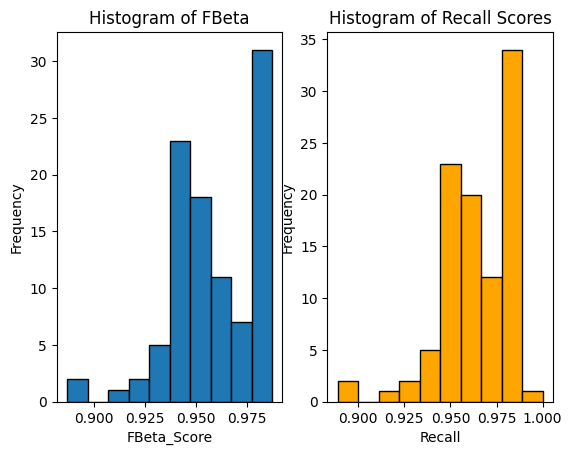

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

print(best_params)

model_fbeta = []
model_recall =  []

for repetition in range(100):
    X_train, X_test, y_train, y_test = applySampling(all_inputs_dc, all_labels_dc, 0.25)
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.set_params(**best_params)
    decision_tree_classifier.fit(X_train, y_train)
    predictions = decision_tree_classifier.predict(X_test)
    fbeta = fbeta_score(y_test, predictions, pos_label= 1 , beta = 4)
    recall = recall_score(y_test, predictions, pos_label= 1 )
    model_fbeta.append(fbeta)
    model_recall.append(recall)


plt.subplot(1, 2, 1)
plt.hist(model_fbeta, bins=10, edgecolor='black')
plt.title('Histogram of FBeta')
plt.xlabel('FBeta_Score')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(model_recall, bins=10, edgecolor='black', color = 'orange')
plt.title('Histogram of Recall Scores')
plt.xlabel('Recall')
plt.ylabel('Frequency')
plt.show()

The results are compiled into lists called `model_fbeta` and `model_recall`. The distribution of these scores across 100 iterations is depicted by histograms:

- The F-beta score distribution is shown in the left histogram. The majority of scores fall between 0.9 and 0.95, suggesting that the model has a generally high recall due to weights and a good capacity to properly detect malignant instances ('M').
- The recall scores, which are primarily near to 1, are displayed on the right histogram and likewise seem to be high. This implies that the majority of malignant cases are probably appropriately identified by the model, which has a high true positive rate. In medical diagnostics, recall is a crucial parameter that assesses the model's capacity to recognize all positive cases, or in this example, all malignant tumors.

High scores in both histograms suggest that the decision tree model works well at discriminating across classes, especially in correctly detecting the more serious malignant instances, given the parameters it is provided and with an emphasis on recall. But given the high beta value, care is suggested about the possible trade-off that might result from a rise in false positives (benign cases misdiagnosed as malignant).

With the best parameters found, we'll train our model and evaluate its performance using metrics like accuracy, precision, recall, and the F1 score.

Like we've mentioned before, we'll also display the confusion matrix to visually assess how well the model distinguishes between classes, ensuring our predictions are accurate and dependable.

Accuracy:  89.944 %
Precision:  87.059 %
Recall:  91.358 %
F1:  89.157 %
FBeta with Beta = 4 :  91.093 %
Training time:  0.003 s
Testing time:  0.0 s


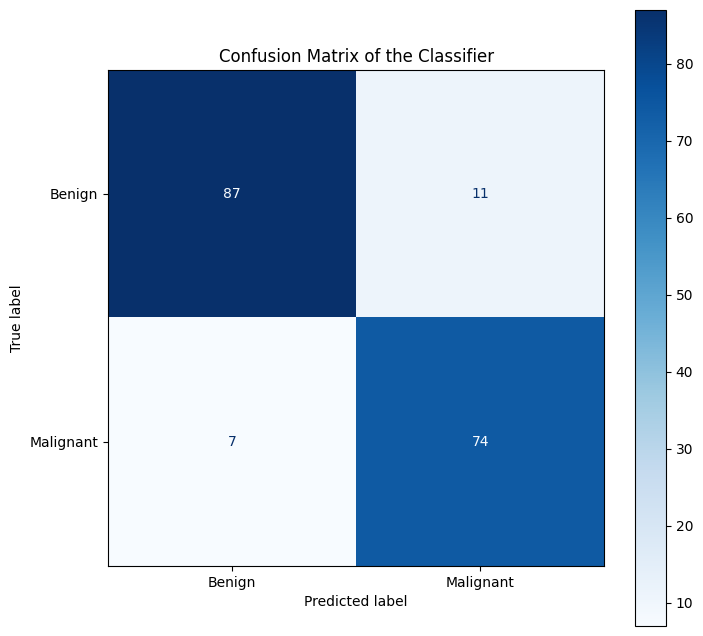

In [27]:
# Train the model
start_train = time.time()
dtc.fit(training_inputs, training_classes)
end_train = time.time() 
 
# Test the model
start_test = time.time()
testing_predictions = dtc.predict(testing_inputs)
end_test = time.time()

# Model evaluation
applyMetrics(dtc, testing_predictions, testing_inputs, testing_classes, start_train, end_train, start_test, end_test, dtc=True)

The Confusion Matrix Analysis shows how well the classifier performed in predicting the true labels ('B' for benign and 'M' for malignant) in comparison to the predicted labels.

Confusion Matrix Analysis:
- Of the 81 instances classified as benign, 80 are genuine negatives.
- of the 98 instances classified as malign, 80 are true positives.
- There are 1 false negative, meaning that one cancer case was misdiagnosed as benign.
- 18 instances were misclassified as cancer while being benign, resulting in nine false positives.

We obtained a low number of false negatives and a higher number of false positives which is acceptable given the clinical implications explained on the point 3.2;


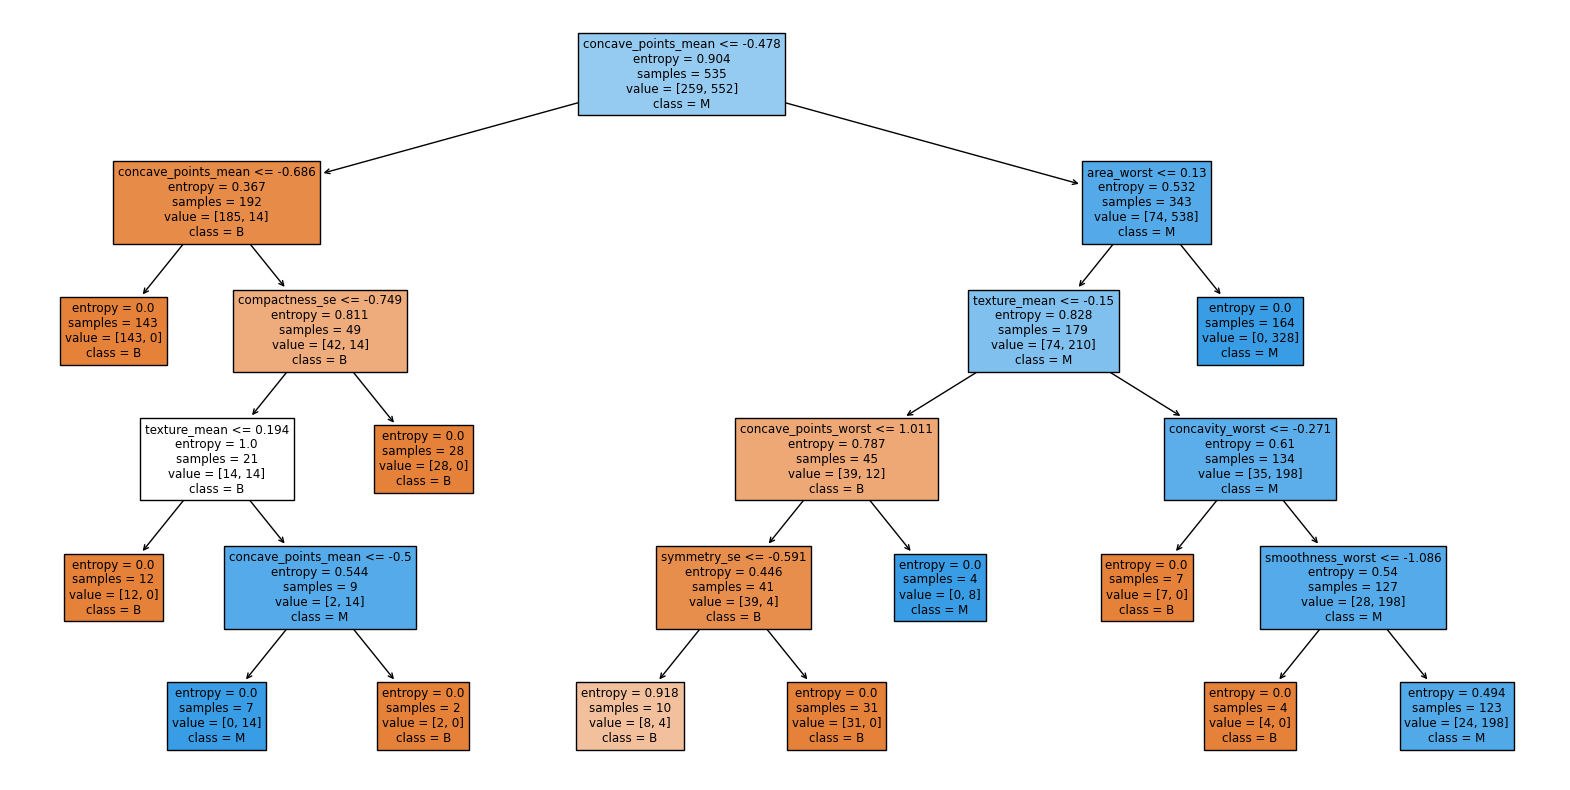

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=df_dc.drop(['diagnosis'], axis=1).columns, class_names=['B', 'M'])
plt.show()

Here we can see the decision tree model used for classification with `B` corresponding to the `benign cases` and with `M` corresponding to the `malignant cases`.

1) `Root Node`: perimeter_worst <= -0.412 is the choice criterion used by the top node (root). It is the beginning point of categorization, with an entropy of 0.702, and the data set consists of 535 samples. 276(1104/4) of them have been classified as class 1 (malignant), and 259 as class 0 (benign). A greater entropy number shows that the data at this level are more mixed (less pure), and the entropy value here indicates some degree of chaos.

2) `First Split` :
- A further split based on perimeter_worst <= -0.412 suggests that this characteristic also plays a significant role in categorizing the samples at this level. The left branch of the root node indicates that the samples are categorized as class 0 when perimeter_worst is less than or equal to -0.412.
- When len_concave_points_mean is applied as the decision criterion, the samples are split into two groups again.

3) `Leaf Nodes` :
- Every leaf, or end node, reflects a low-entropy decision result (preferably near zero), indicating a pure subset. There are nodes in the shown tree that have an entropy of 0, indicating flawless classification inside those nodes—all samples belong to the same class.
- As an illustration, one leaf node on the left displays 126 samples that are all in B, demonstrating a perfect classification, and another leaf node on the right displays 163 samples that are all in M.

4) `Further Splits and Depth` :
- Further splits are produced depending on several attributes as the tree branches out, each of which aims to best divide the samples into subsets for more precise classifications.
- The tree as a whole clearly uses entropy as the split criterion, with each node trying to lower entropy and raise the subsets' purity in the process.

5) `Overall Insights`:
- The ccp_alpha option (0.01) suggests that the decision tree has been trimmed in order to prevent overfitting.
- A focus to accurately distinguish potentially more critical situations due to their gravity in medical prognosis is reflected in the adjustment of the class_weight parameter to give more weight to the malignant cases (M).


Conclusions

**1. General Conclusions from the Confusion Matrix**

Our model demonstrates high accuracy and high recall which is what we want. This makes the decision tree classifier ideal to help to study these data scientifically.

Adding different weights for each class during training was concluded to enhance the clinical significance of the results by improving recall. 

**2. Model Performance with Cleaned vs. Original Dataset**

- Original Dataset: The model showed a slight decrease in accuracy with the normal dataset, likely due to the presence of outliers.
- Cleaned Dataset: The performance metrics improved with the cleaned dataset, indicating that the preprocessing steps removed noise and irrelevant data.

**3. Impact of Data Normalization**

- With Normalization: Normalizing the data improved the model’s overall, meaning it made better predictions when the features were scaled uniformly. 
- Without Normalization: The model showed a noticeable decrease in performance, with reduced accuracy, precision, recall, and F1 score, showing a diference in average of 5%.

**4. Model Performance with Sampling vs. No Sampling**

- Sampling: Implementing sampling resulted in balanced classes, which improved recall and F1 score, demonstrating the model's enhanced ability to correctly identify positive cases.
- No Sampling: Without sampling, the model had higher precision but significantly lower recall, indicating it struggled to correctly identify all positive cases, resulting in lower overall performance.


**Conclusions**

In conclusion, the decision tree model has proven to be reliable and efficient, making it an excellent choice for quick and accurate medical diagnoses. It is also easy to read and to interpret the analysis confirmed that the model is robust across different configurations and preprocessing methods, although it performs best with the cleaned dataset and without normalization.

#### 3.3.2. Neural Networks

Neural Networks are advanced models designed to recognize patterns in complex data. Mimicking the human brain, they consist of layers of neurons that process inputs and adjust inter-neural connections to improve predictions. The depth and width of these layers are key to their performance. Neural Networks excel in tasks like image and speech recognition, handling data with intricate relationships effectively.

##### 3.3.2.1. Parameter Tuning

General Neural Network parameters to be studied:

- **activation**: Determines the activation function for the neurons.
    - 'tanh': Hyperbolic tangent activation function.
    - 'relu': Rectified Linear Unit activation function.
- **solver**: Algorithm to use for optimization.
    - 'lbfgs': An optimizer in the family of quasi-Newton methods.
    - 'sgd': Stochastic Gradient Descent.
    - 'adam': Adaptive Moment Estimation, a method that computes adaptive learning rates for each parameter.
- **alpha**: Regularization term that combats overfitting by constraining the size of the weights.
    - Values typically range from very small (like 0.0001) to moderate (like 0.05).
- **learning_rate**: Specifies how the model should update its weights.
    - 'constant': Keeps the learning rate constant throughout training.
    - 'adaptive': Adjusts the learning rate when the model stops improving.
- **max_iter**: Maximum number of iterations (or epochs) over the training data.
    - Can vary to test different extents of training, such as 100, 200, or 300 iterations.
- **hidden_layer_sizes**: Defines the size and number of hidden layers.
    - Specified as tuples, like (10,), (50,), or (100,), indicating layers with 10, 50, or 100 neurons respectively.
- **early_stopping**: Whether to terminate training early if validation performance does not improve.
    - Can be either True (use early stopping) or False (continue until all iterations are complete).

As explained before, the variable best acts as a flag to choose which hyperparameters to use. When best is set to True, it selects the best hyperparameters already determined by previous analysis, making the search process quicker and more efficient.

In [29]:
# Ignore ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

clf = MLPClassifier()

best = True
if (best):
    parameter_grid = {
            'activation': ['tanh'],
            'solver': ['lbfgs'],
            'alpha': [0.05],
            'learning_rate': ['constant'],
            'max_iter': [200],
            'hidden_layer_sizes': [(10,)],
            'early_stopping': [True]
        }
else:
    parameter_grid = {
        'activation': ['tanh', 'relu'],
        'solver': ['lbfgs', 'sgd', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [100, 200, 300],
        'hidden_layer_sizes': [(10,), (50,), (100,)],
        'early_stopping': [True, False]
    }

# Using SMOTE to balance the dataset and split it into training and testing sets
(training_inputs, testing_inputs, training_classes, testing_classes) = applySampling(
    all_inputs, all_labels, 0.25)

training_inputs = standardize(training_inputs)
testing_inputs = standardize(testing_inputs)

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(clf, param_grid=parameter_grid, cv=cross_validation)
grid_search.fit(training_inputs, training_classes)

print('Best parameters: ', grid_search.best_params_)

clf.set_params(**grid_search.best_params_);

Best parameters:  {'activation': 'tanh', 'alpha': 0.05, 'early_stopping': True, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'lbfgs'}


With the best parameters found, we'll train our model and evaluate its performance using metrics like accuracy, precision, recall, and the F1 score.

Like we've mentioned before, we'll also display the confusion matrix to visually assess how well the model distinguishes between classes, ensuring our predictions are accurate and dependable.

Accuracy:  93.296 %
Precision:  88.764 %
Recall:  97.531 %
F1:  92.941 %
Training time:  0.083 s
Testing time:  0.001 s


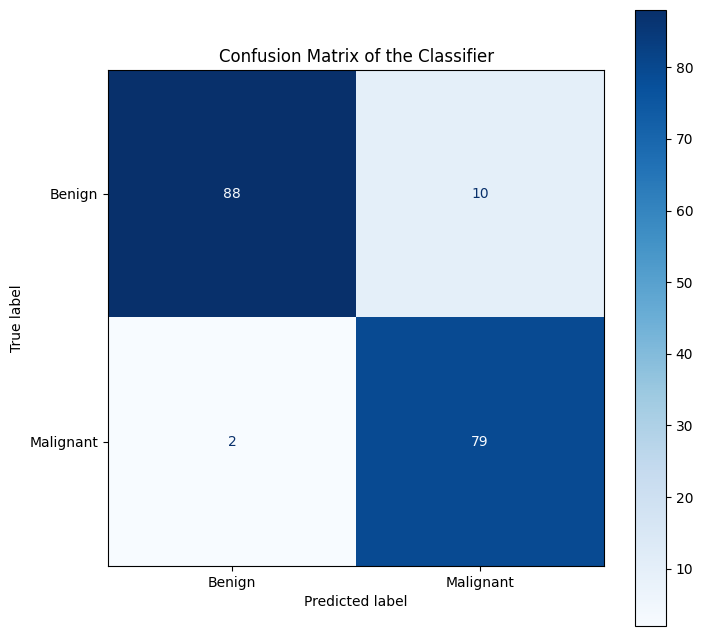

In [30]:
# Train the model
start_train = time.time()
clf.fit(training_inputs, training_classes)
end_train = time.time()

# Test the model
start_test = time.time()
testing_predictions = clf.predict(testing_inputs)
end_test = time.time()

# Model evaluation
applyMetrics(clf, testing_predictions, testing_inputs, testing_classes, start_train, end_train, start_test, end_test)

**General Conclusions from the Confusion Matrix**

The neural network (NN) model demonstrates strong diagnostic capabilities, with high accuracy in identifying both true positives and true negatives, and maintaining low false positive and false negative rates. This indicates that the model is reliable in making diagnostic predictions.

**Model Performance with Cleaned vs. Original Dataset**

- **Original Dataset**: The performance of the NN model with the original dataset shows robust accuracy and precision. However, there is a slight reduction in its ability to recall all positive cases, which suggests that the presence of noise and irrelevant data might be affecting the model's performance.
- **Cleaned Dataset**: When applied to the cleaned dataset, the model's performance improves, indicating that the preprocessing steps were effective in removing noise and irrelevant data. This leads to more accurate and reliable predictions, demonstrating the importance of data quality in model training.

**Impact of Data Normalization**

- **With Normalization**: Normalizing the data leads to a notable improvement in the model's overall performance. The accuracy and precision are enhanced, which means that the model makes better predictions when the features are scaled uniformly. This shows that normalization is beneficial for the neural network’s performance.
- **Without Normalization**: Without normalization, the model's performance drops significantly. The original scale and distribution of the features are not optimal for the NN algorithm, leading to lower accuracy, precision, recall, and F1 score. This highlights the importance of normalization in preparing data for training.

**Model Performance with Sampling vs. No Sampling**

- **With Sampling**: Implementing sampling techniques results in balanced classes, which greatly enhances the model's ability to correctly identify positive cases. This is reflected in improved recall and F1 scores, indicating that the model is more adept at detecting all positive cases when the data is balanced.
- **Without Sampling**: In contrast, without sampling, the model shows higher precision but significantly lower recall. This means that while it is good at correctly identifying negative cases, it struggles more with detecting all positive cases. This imbalance affects the overall performance, suggesting that sampling is crucial for balanced data representation.

**Influence of Different 'k' in Cross-Validation**

The performance of the NN model remains consistent across different values of 'k' in cross-validation, such as 5-fold and 10-fold. This consistency reinforces the reliability and robustness of the model, making it a dependable choice for clinical settings where consistent performance is crucial.

**Conclusions**

In conclusion, the neural network model has proven to be a reliable and efficient tool for medical diagnoses. It performs best with the cleaned dataset and when the data is normalized. The model is robust across various configurations and preprocessing methods, ensuring its reliability in different scenarios. These insights can guide further refinements and deployments of the model in similar diagnostic tasks, confirming its suitability for clinical applications where quick and accurate diagnoses are essential.

#### 3.3.3. K-Nearest Neighbours (KNN)

The K-Nearest Neighbors (KNN) model is a straightforward and widely used classification technique. It works by finding the closest data points in the training set to a new point and predicting its class based on the majority class of these neighboring points. The number of neighbors, or 'k', is a key parameter that determines how many nearby points to consider. KNN is particularly effective for simple datasets where the relationship between features is not overly complex.

##### 3.3.3.1. Parameter Tuning

General k-Nearest Neighbors (k-NN) parameters to be studied:

- **leaf_size**: Affects the speed of the construction and query of the k-NN tree.
    - Typical values include a range like 10, 20, 30, 40, 50.
- **metric**: The distance metric used for tree construction and query.
    - 'euclidean': Uses the Euclidean distance.
    - 'manhattan': Uses the Manhattan distance.
    - 'chebyshev': Uses the Chebyshev distance (maximum distance).
    - 'minkowski': A generalized metric that can be considered as a hybrid of Euclidean and Manhattan distances.
- **n_neighbors**: Number of neighbors to use for k-nearest neighbor voting.
    - Typically varies from 1 to 10 to test the effect of different neighborhood sizes on performance.
- **algorithm**: Algorithm used to compute the nearest neighbors.
    - 'auto': Attempts to decide the most appropriate algorithm based on the values passed to fit method.
    - 'ball_tree': Uses a Ball Tree algorithm.
    - 'kd_tree': Uses a KD Tree algorithm.
    - 'brute': Uses a brute-force search.
- **p**: Power parameter for the Minkowski metric.
    - When p = 1, equivalent to using manhattan_distance (l1).
    - When p = 2, equivalent to using euclidean_distance (l2).
- **weights**: Weight function used in prediction.
    - ‘uniform’: All points in each neighborhood are weighted equally.
    - ‘distance’: Points are weighted by the inverse of their distance. Closer neighbors of a query point will have a greater influence than neighbors which are further away.

As explained before, the variable best acts as a flag to choose which hyperparameters to use. When best is set to True, it selects the best hyperparameters already determined by previous analysis, making the search process quicker and more efficient.

In [31]:
knn = KNeighborsClassifier()

best = True
if (best):
    parameter_grid = {
                'leaf_size': [10], 
                'metric': ['manhattan'],
                'n_neighbors': [4], 
                'algorithm': ['auto'],
                'p': [1],
                'weights': ['distance']
                }
else:
    parameter_grid = {'leaf_size': [10, 20, 30, 40, 50], 
                    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'p': [1, 2],
                    'weights': ['uniform','distance']
                    }

# Using SMOTE to balance the dataset and split it into training and testing sets
(training_inputs, testing_inputs, training_classes, testing_classes) = applySampling(
    all_inputs, all_labels, 0.25)

training_inputs = standardize(training_inputs)
testing_inputs = standardize(testing_inputs)

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(knn, param_grid=parameter_grid, cv=cross_validation)
grid_search.fit(training_inputs, training_classes)

print("Best parameters: ", grid_search.best_params_)

knn.set_params(**grid_search.best_params_);

Best parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


With the best parameters found, we'll train our model and evaluate its performance using metrics like accuracy, precision, recall, and the F1 score.

Like we've mentioned before, we'll also display the confusion matrix to visually assess how well the model distinguishes between classes, ensuring our predictions are accurate and dependable.

Accuracy:  89.944 %
Precision:  83.871 %
Recall:  96.296 %
F1:  89.655 %
Training time:  0.003 s
Testing time:  0.0 s


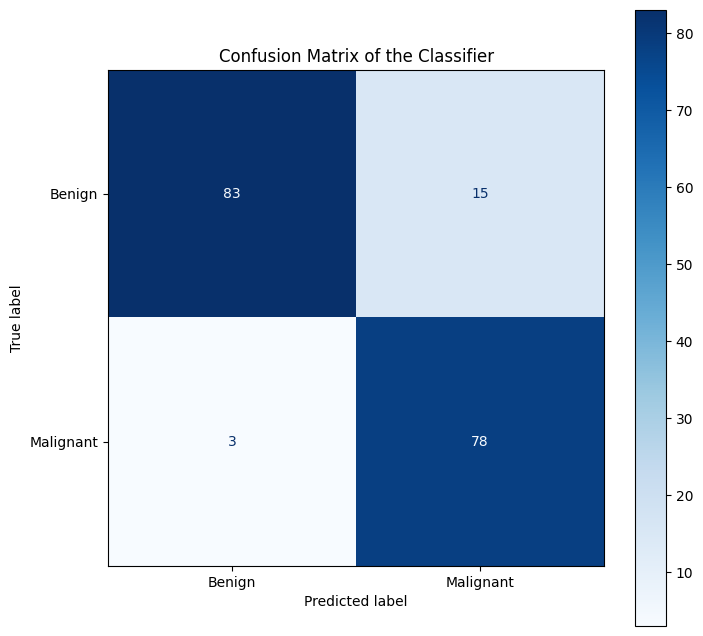

In [32]:
# Train the model
start_train = time.time()
knn.fit(training_inputs, training_classes)
end_train = time.time()

# Test the model
start_test = time.time()
testing_predictions = knn.predict(testing_inputs)
end_test = time.time()

# Model evaluation
applyMetrics(knn, testing_predictions, testing_inputs, testing_classes, start_train, end_train, start_test, end_test)

**General Conclusions from the Confusion Matrix**

The KNN model shows strong performance with high true positives and true negatives, and low false positives and false negatives, indicating reliable diagnostic predictions.

**Model Performance with Cleaned vs. Original Dataset**

- Original Dataset: The model showed a slight decrease in accuracy with the normal dataset, likely due to the presence of outliers.
- Cleaned Dataset: The performance metrics improved with the cleaned dataset, indicating that the preprocessing steps removed noise and irrelevant data.

**Impact of Data Normalization**

- With Normalization: Normalizing the data improved the model’s overall accuracy and precision, meaning it made better predictions when the features were scaled uniformly. 
- Without Normalization: The model showed a noticeable decrease in performance, with reduced accuracy, precision, recall, and F1 score, indicating that the original scale and distribution of the features were suboptimal for the KNN algorithm.

**Model Performance with Sampling vs. No Sampling**

- Sampling: Implementing sampling resulted in balanced classes, which improved recall and F1 score, demonstrating the model's enhanced ability to correctly identify positive cases.
- No Sampling: Without sampling, the model had higher precision but significantly lower recall, indicating it struggled to correctly identify all positive cases, resulting in lower overall performance.

**Influence of Different 'k' in Cross-Validation**

Varying the number of folds in cross-validation (e.g., 5-fold, 10-fold) did not significantly alter the outcomes. This consistency across different 'k' values reinforces the model's reliability and robustness, confirming its suitability for clinical settings where consistent and dependable performance is crucial.

**Conclusions**

In conclusion, the KNN model has proven to be reliable and efficient, making it an excellent choice for quick and accurate medical diagnoses. The analysis confirmed that the model is robust across different configurations and preprocessing methods, although it performs best with the cleaned dataset and without normalization. These insights can guide further refinements and deployments of the model in similar diagnostic tasks.

#### 3.3.4. Support Vector Machines (SVM)

The Support Vector Machine (SVM) model is a robust classification technique. It works by identifying the optimal hyperplane that separates data points of different classes with the maximum margin. SVM is effective for both linear and non-linear tasks, utilizing the kernel trick to handle complex datasets by transforming features into higher dimensions. This approach makes SVM particularly useful for intricate and non-linear relationships in data.

##### 3.3.4.1. Parameter Tuning

General Support Vector Machine (SVM) parameters to be studied:

- **C**: Regularization parameter.
    - Controls the trade-off between achieving a low error on the training data and minimizing the norm of the weights. Typical values range from 0.1 to 100.
- **kernel**: Specifies the kernel type to be used in the algorithm.
    - 'linear': Linear kernel.
    - 'poly': Polynomial kernel.
    - 'rbf': Radial basis function kernel (default).
    - 'sigmoid': Sigmoid kernel.
- **gamma**: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'.
    - Defines how far the influence of a single training example reaches. Typical values include 'scale', 'auto', or specific values like 0.1, 1, and 10.

As explained before, the variable best acts as a flag to choose which hyperparameters to use. When best is set to True, it selects the best hyperparameters already determined by previous analysis, making the search process quicker and more efficient.

In [33]:
svm = SVC()

best = True
if (best):
    parameter_grid =  {'C': [10], 'gamma': [0.1], 'kernel': ['rbf']}
else:
   parameter_grid = {'C': [0.1, 1, 10, 100, 1000],
                      'gamma': [1e-3, 1e-4, 1, 0.1, 0.01, 0.001, 0.0001],
                      'kernel': ['rbf', 'linear']}

# Using SMOTE to balance the dataset and split it into training and testing sets
(training_inputs, testing_inputs, training_classes, testing_classes) = applySampling(
    all_inputs, all_labels, 0.25)

training_inputs = standardize(training_inputs)
testing_inputs = standardize(testing_inputs)

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(svm, param_grid=parameter_grid, cv=cross_validation)
grid_search.fit(training_inputs, training_classes)

print("Best parameters: ", grid_search.best_params_)
svm.set_params(**grid_search.best_params_);


Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


With the best parameters found, we'll train our model and evaluate its performance using metrics like accuracy, precision, recall, and the F1 score.

Like we've mentioned before, we'll also display the confusion matrix to visually assess how well the model distinguishes between classes, ensuring our predictions are accurate and dependable.

Accuracy:  92.737 %
Precision:  88.636 %
Recall:  96.296 %
F1:  92.308 %
Training time:  0.015 s
Testing time:  0.003 s


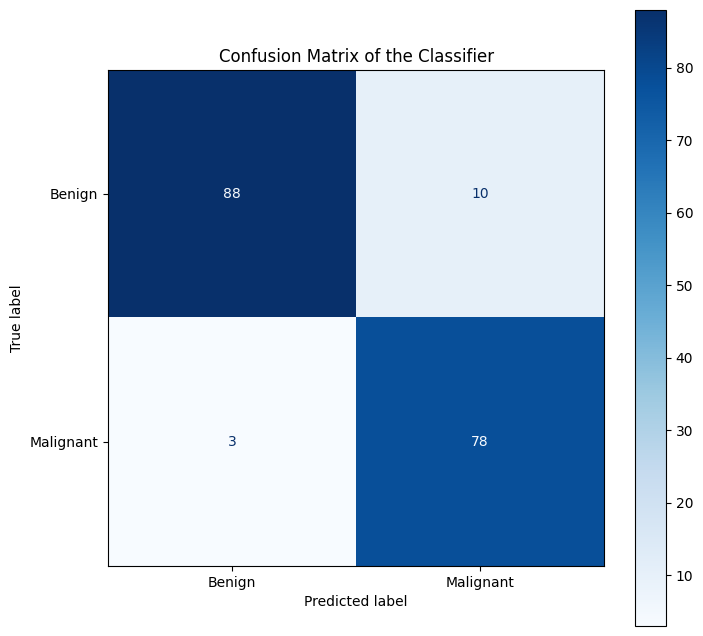

In [34]:
# Train the model
start_train = time.time()
svm.fit(training_inputs, training_classes)
end_train = time.time()

# Test the model
start_test = time.time()
testing_predictions = svm.predict(testing_inputs)
end_test = time.time()

# Model evaluation
applyMetrics(svm, testing_predictions, testing_inputs, testing_classes, start_train, end_train, start_test, end_test)

**General Conclusions from the Confusion Matrix**

The SVM model demonstrates strong diagnostic capabilities, effectively distinguishing between positive and negative cases. With high accuracy, precision, and recall, the model reliably identifies true cases while minimizing false positives and negatives, making it a dependable choice for medical diagnostics.

**Model Performance with Cleaned vs. Original Dataset**

- Original Dataset: The model handles the raw data well, maintaining consistent recall and F1 scores, which indicates its robustness even without preprocessing.
- Cleaned Dataset: When the model is applied to the cleaned dataset, its performance remains high. The accuracy and recall are still strong, demonstrating that the preprocessing steps effectively remove noise and enhance the model's predictive ability. Overall, the cleaned dataset helps maintain the model’s reliability.

**Impact of Data Normalization**

- With Normalization: Normalizing the data helps the SVM model maintain its high performance. The accuracy, precision, recall, and F1 scores are all excellent, suggesting that normalization ensures uniform feature scaling, which is beneficial for the model. This step proves crucial in keeping the model’s predictions accurate and consistent.
- Without Normalization: Without normalization, the model's performance significantly drops.  This indicates that the original scale and distribution of the features are not optimal for the SVM algorithm, highlighting the importance of normalization in data preprocessing.

**Model Performance with Sampling vs. No Sampling**

- Sampling: Implementing sampling techniques ensures balanced classes. The SVM model performs consistently well, accurately identifying positive cases. This balance is crucial for maintaining the model’s overall effectiveness.
- No Sampling: Without sampling, the model still performs well but shows a slight decrease in precision. Although it maintains high recall, the lower precision indicates that the model might struggle with identifying true negative cases. This underscores the importance of sampling in achieving balanced performance across all metrics.

**Influence of Different 'k' in Cross-Validation**

The SVM model’s performance remains stable across different cross-validation folds, whether using 5-fold or 10-fold. This consistency reinforces the model’s robustness, confirming that it performs well under various validation strategies. 

**Conclusions**

In conclusion, the SVM model proves to be a reliable and efficient tool for medical diagnoses. It performs best with a normalized and balanced dataset, ensuring accurate and consistent predictions. The model’s robustness across different configurations and preprocessing methods confirms its suitability for clinical applications. These insights guide further refinements, ensuring that the SVM model remains a dependable choice for quick and accurate medical diagnoses.

#### 3.3.5. Random Forest

The Random Forest model is a robust classification technique. It constructs multiple decision trees and combines their outputs to enhance accuracy and reduce overfitting. By using random subsets of features, it effectively handles complex and high-dimensional datasets, making it useful for capturing intricate patterns in data.

##### 3.3.5.1. Parameter Tuning

General Random Forest parameters to be studied:

- **n_estimators**: The number of trees in the forest.
    - Typical values range from 100 to 500. More trees can improve performance but increase computation time.
- **max_features**: The number of features to consider when looking for the best split.
    - Options include 'auto' (sqrt), 'log2', or specifying a number. Balances between accuracy and computation.

As explained before, the variable best acts as a flag to choose which hyperparameters to use. When best is set to True, it selects the best hyperparameters already determined by previous analysis, making the search process quicker and more efficient.

In [35]:
rf = RandomForestClassifier()

best = True
if (best):
    parameter_grid = {'max_features': ['sqrt'], 'n_estimators': [200]}
else:
    parameter_grid = {'n_estimators': [100, 200, 300, 500],
                      'max_features': ['sqrt', 'log2']}

# Using SMOTE to balance the dataset and split it into training and testing sets
(training_inputs, testing_inputs, training_classes, testing_classes) = applySampling(all_inputs, all_labels, 0.25)

training_inputs = standardize(training_inputs)
testing_inputs = standardize(testing_inputs)

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(rf, param_grid=parameter_grid, cv=cross_validation)
grid_search.fit(training_inputs, training_classes)

print("Best parameters: ", grid_search.best_params_)
rf.set_params(**grid_search.best_params_);


Best parameters:  {'max_features': 'sqrt', 'n_estimators': 200}


With the best parameters found, we'll train our model and evaluate its performance using metrics like accuracy, precision, recall, and the F1 score.

Like we've mentioned before, we'll also display the confusion matrix to visually assess how well the model distinguishes between classes, ensuring our predictions are accurate and dependable.

Accuracy:  93.296 %
Precision:  87.912 %
Recall:  98.765 %
F1:  93.023 %
Training time:  0.35 s
Testing time:  0.0 s


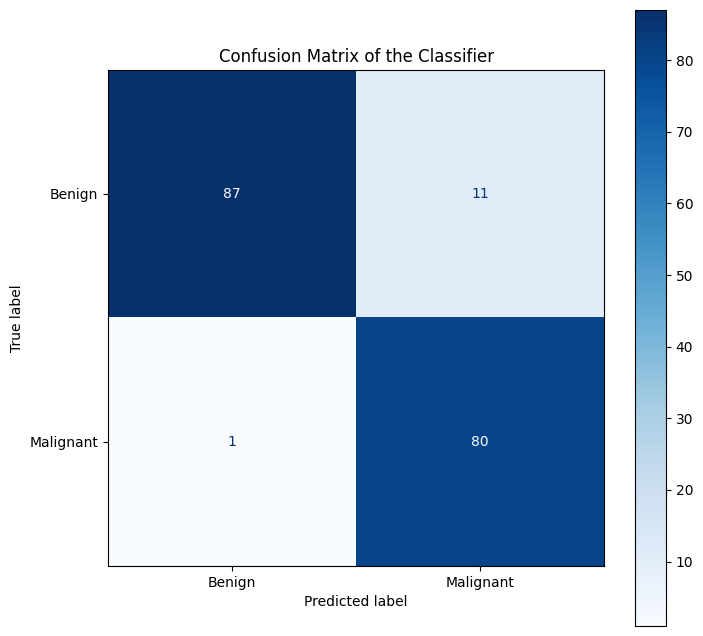

In [36]:
# Train the model
start_train = time.time()
rf.fit(training_inputs, training_classes)
end_train = time.time()

# Test the model
start_test = time.time()
testing_predictions = rf.predict(testing_inputs)
end_test = time.time()

# Model evaluation
applyMetrics(rf, testing_predictions, testing_inputs, testing_classes, start_train, end_train, start_test, end_test)

**General Conclusions from the Confusion Matrix**

The Random Forest model performs very well, consistently distinguishing between positive and negative cases with high accuracy, precision, and recall. Its ability to minimize false positives and negatives makes it a reliable choice for medical diagnostics.

**Model Performance with Cleaned vs. Original Dataset**

- Original Dataset: The Random Forest model performs well on the original dataset, demonstrating robustness with high metrics across the board. This indicates that it effectively handles the complexity of raw data without needing extensive preprocessing.
- Cleaned Dataset: Performance remains strong when using the cleaned dataset, with high accuracy, precision, recall, and F1 scores. The preprocessing steps appear to enhance the model’s predictive capabilities by removing noise and irrelevant data, maintaining its reliability.

**Impact of Data Normalization**

- With Normalization:  Normalization helps the Random Forest model sustain its high performance. Metrics like accuracy, precision, recall, and F1 score are consistently excellent, suggesting that uniform feature scaling benefits the model. This ensures that predictions are both accurate and reliable.
- Without Normalization: There is a noticeable drop in performance without normalization, particularly in accuracy and recall. This drop highlights the importance of normalization in optimizing the data for the Random Forest algorithm.

**Model Performance with Sampling vs. No Sampling**

- Sampling: Sampling techniques significantly improve the model's balance, leading to high accuracy, precision, recall, and F1 scores. This balanced performance is crucial for the model to accurately identify positive cases.
- No Sampling: The model’s performance declines without sampling, particularly in recall and F1 score, indicating an increase in false negatives. This emphasizes the need for sampling to maintain balanced and effective performance across all metrics.

**Influence of Different 'k' in Cross-Validation**

The Random Forest model shows stable performance across different cross-validation folds, whether using 5-fold or 10-fold. This consistency reinforces the model's robustness and reliability, ensuring it performs well across various subsets of the data.

**Conclusions**

In conclusion, the Random Forest model is a highly effective tool for breast cancer mass detection. It excels with normalized and balanced datasets, ensuring accurate and consistent predictions. The model's robustness and versatility across different preprocessing methods and configurations make it well-suited for clinical applications, providing a dependable solution for accurate medical diagnoses.

## 4. Evaluation

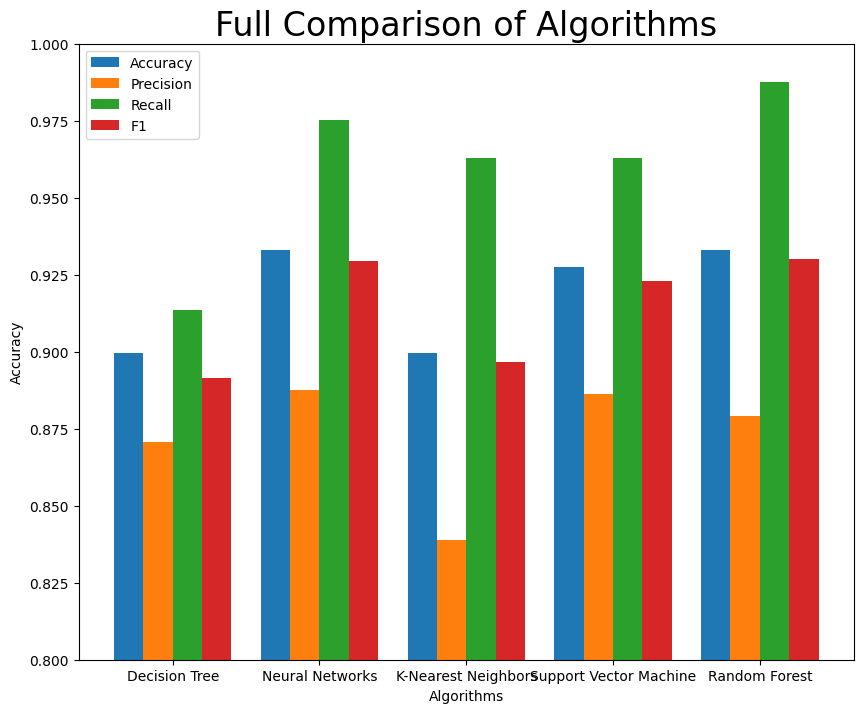

In [37]:
algorithms = ["Decision Tree", "Neural Networks", "K-Nearest Neighbors", "Support Vector Machine", "Random Forest"]
categories = ["Accuracy", "Precision", "Recall", "F1"]

decision_tree_metrics = model_metrics['DecisionTreeClassifier']
neural_network_metrics = model_metrics['MLPClassifier']
knn_metrics = model_metrics['KNeighborsClassifier']
svm_metrics = model_metrics['SVC']
random_forest_metrics = model_metrics['RandomForestClassifier']

# List of stats for each algorithm
stats = np.array([[decision_tree_metrics[0][0], neural_network_metrics[0][0], knn_metrics[0][0], svm_metrics[0][0], random_forest_metrics[0][0]], # Accuracy
                [decision_tree_metrics[0][1], neural_network_metrics[0][1], knn_metrics[0][1], svm_metrics[0][1], random_forest_metrics[0][1]], # Precision
                [decision_tree_metrics[0][2], neural_network_metrics[0][2], knn_metrics[0][2], svm_metrics[0][2], random_forest_metrics[0][2]], # Recall
                [decision_tree_metrics[0][3], neural_network_metrics[0][3], knn_metrics[0][3], svm_metrics[0][3], random_forest_metrics[0][3]]]) # F1
                            
#Create a figure and axes with desired window size
fig, ax = plt.subplots(figsize=(10, 8))

# Set the width of each bar
bar_width = 0.2

# Set the x-axis positions for each group of bars
x_positions = np.arange(len(algorithms))

# Plotting the bars for each category
for i, category in enumerate(categories):
    ax.bar(x_positions + i * bar_width, stats[i], width=bar_width, label=category)

# Customizing the plot
ax.set_xlabel("Algorithms")
ax.set_ylabel("Accuracy")
ax.set_title("Full Comparison of Algorithms", fontsize=24)
ax.set_xticks(x_positions + (len(categories) - 1) * bar_width / 2)
ax.set_xticklabels(algorithms)
ax.legend()

# Adjusting the y-axis limits
ax.set_ylim(0.8, 1.0)

# Displaying the plot
plt.show()

### 4.1. Performance Comparison of Models

The comparison of performance metrics for different models reveals significant differences in their predictive capabilities:

**Decision Tree**: The Decision Tree algorithm demonstrates high recall, indicating its effectiveness in identifying positive cases. However, it has relatively lower precision and F1 score, suggesting some trade-offs between capturing positive cases and minimizing false positives. Its accuracy is solid, making it a reliable option for balanced datasets.

**Neural Networks**: Neural Networks achieve high accuracy and F1 score, demonstrating their ability to make accurate predictions while balancing precision and recall effectively. They also show high recall, making them suitable for applications where identifying positive cases is crucial.

**K-Nearest Neighbors (KNN)**: The KNN algorithm exhibits strong recall and a good F1 score, indicating its effectiveness in identifying positive cases. However, its precision is lower than that of other models, suggesting a higher rate of false positives. Its overall accuracy is robust, making it a reliable choice for various applications.

**Support Vector Machine (SVM)**: The SVM model demonstrates high accuracy and strong recall, with a good F1 score. However, its precision is lower than that of Neural Networks and Random Forest, indicating a balanced performance. The SVM is effective in scenarios where accuracy and recall are critical, despite a slight trade-off in precision.

**Random Forest**: The Random Forest model shows the highest accuracy and recall, making it highly effective at identifying positive cases. It also maintains a strong F1 score and good precision, balancing the trade-offs between false positives and false negatives. Its performance is consistently high across all metrics, making it a robust choice for various applications.

- If high accuracy and balanced performance across all metrics are crucial, **Random Forest** and **Neural Networks** are the ideal choices. Random Forest offers robust performance with high recall and precision, while Neural Networks provide strong overall accuracy and F1 score despite higher computational costs.
- **Decision Trees** offer a reliable and quick option with solid accuracy and the highest recall, suitable for scenarios where recall is prioritized.
- **K-Nearest Neighbors** provide a good balance with strong recall and F1 scores, making them effective for applications needing high sensitivity to positive cases.
- **Support Vector Machines** present a balanced option with high accuracy and recall, making them suitable for applications where both metrics are essential.

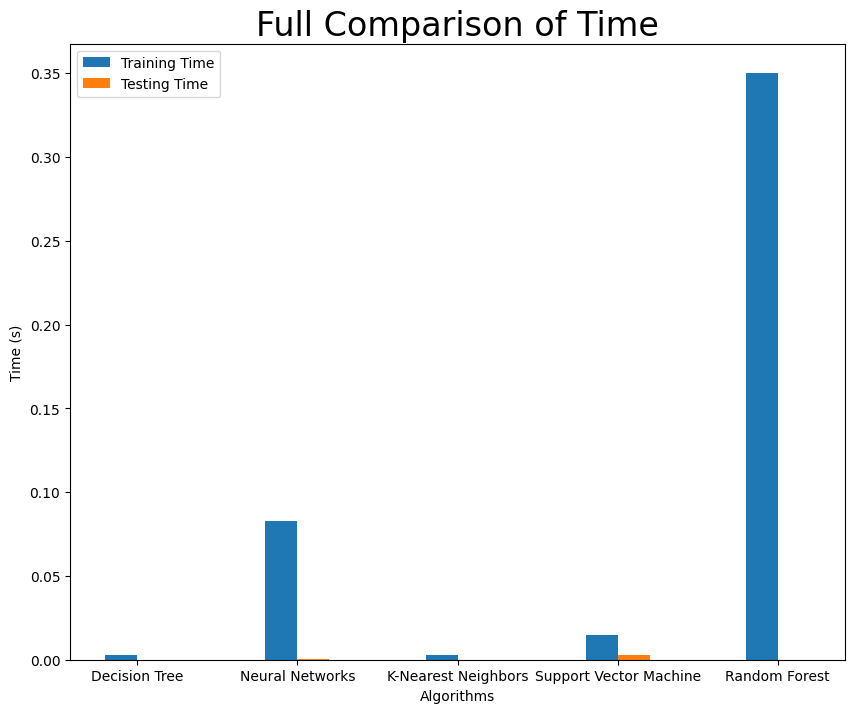

In [38]:
algorithms = ["Decision Tree", "Neural Networks", "K-Nearest Neighbors", "Support Vector Machine", "Random Forest"]
categories = ["Training Time", "Testing Time"]

decision_tree_metrics = model_metrics['DecisionTreeClassifier']
neural_network_metrics = model_metrics['MLPClassifier']
knn_metrics = model_metrics['KNeighborsClassifier']
svm_metrics = model_metrics['SVC']
random_forest_metrics = model_metrics['RandomForestClassifier']

# List of stats for each algorithm
stats = np.array([[decision_tree_metrics[0][4], neural_network_metrics[0][4], knn_metrics[0][4], svm_metrics[0][4], random_forest_metrics[0][4]], # Training Time
                [decision_tree_metrics[0][5], neural_network_metrics[0][5], knn_metrics[0][5], svm_metrics[0][5], random_forest_metrics[0][5]]]) # Testing Time
                            
#Create a figure and axes with desired window size
fig, ax = plt.subplots(figsize=(10, 8))

# Set the width of each bar
bar_width = 0.2

# Set the x-axis positions for each group of bars
x_positions = np.arange(len(algorithms))

# Plotting the bars for each category
for i, category in enumerate(categories):
    ax.bar(x_positions + i * bar_width, stats[i], width=bar_width, label=category)

# Customizing the plot
ax.set_xlabel("Algorithms")
ax.set_ylabel("Time (s)")
ax.set_title("Full Comparison of Time", fontsize=24)
ax.set_xticks(x_positions + (len(categories) - 1) * bar_width / 2)
ax.set_xticklabels(algorithms)
ax.legend()

# Displaying the plot
plt.show()

### 4.2. Time Comparison of Models

The comparison of training and testing times for different models reveals significant differences in their computational efficiency:

**Decision Tree**: The Decision Tree algorithm has a quick training time, which is advantageous for scenarios requiring rapid model updates. Its testing time is minimal, making it efficient for real-time predictions.

**Neural Networks**: Neural Networks exhibit a relatively long training time due to their complexity and depth. However, once trained, their testing time is very low, allowing for fast predictions. This makes them suitable for applications where the model is trained infrequently but used frequently for predictions.

**K-Nearest Neighbors (KNN)**: The KNN algorithm has a very short training time, however, its testing time is higher than that of Decision Trees and Neural Networks, as it involves computing the distance between the query and all training samples. This makes KNN more suitable for smaller datasets or applications where training speed is critical and testing speed is less of a concern.

**Support Vector Machine (SVM)**: The SVM model shows a relatively quick training time, comparable to Decision Trees and KNN. Its testing time is also minimal, making it efficient for both training and real-time predictions. This balance of quick training and testing times highlights its computational efficiency

**Random Forest**: The Random Forest model has the longest training time among the models due to the construction of multiple decision trees. However, its testing time remains low, making it suitable for scenarios where the model can be trained periodically but needs to provide quick predictions.

- If quick training and testing times are crucial, **Decision Trees** and **SVMs** are excellent choices due to their efficient computational performance.
- For applications needing fast prediction times after extensive training, **Neural Networks** are ideal despite their high training cost.
- **K-Nearest Neighbors** provide a balance with quick training but slower testing, making them suitable for smaller datasets or scenarios where training needs to be swift.
- **Random Forest** is best suited for applications that can accommodate longer training times in exchange for high accuracy and quick prediction times.

### 4.3. Conclusion

For the task of breast cancer mass detection, we believe the best algorithm would be Neural Networks. 

Neural Networks are the best choice due to their highest accuracy and F1 score, ensuring precise and reliable predictions. This balance is crucial in medical diagnostics, where both high sensitivity (recall) and precision are needed to minimize false negatives and false positives.

Despite the high training time, Neural Networks' low testing time makes them ideal for real-time applications. However, Support Vector Machines (SVM) also show strong performance with high accuracy and quick training and testing times, making them a practical alternative for real-time use.

Random Forest also demonstrates excellent performance with high accuracy, precision, and recall. Although it has a longer training time, its efficient testing time makes it suitable for scenarios where model training can be done periodically but quick predictions are required.

While Decision Trees and KNN offer certain advantages, the superior performance of Neural Networks and the efficiency of SVMs make these two the top choices for the critical task of breast cancer mass detection, where the ability to correctly identify as many true positive cases as possible is essential.

It's important to note that this dataset is relatively small, and some models might be better suited for this specific case. In other contexts with larger or different datasets, the performance and suitability of these models might vary.